**Clustering**

*   Clustering analysis is an unsupervised learning method that separates the data points into several specific bunches or groups, such that the data points in the same groups have similar properties and data points in different groups have different properties in some sense.


*   It comprises of many different methods based on different distance measures. E.g. Hierarchical Clustering (distance between points),
 K-Means (distance between points), Affinity propagation (graph distance), Mean-shift (distance between points), DBSCAN (distance between nearest points), Gaussian mixtures (Mahalanobis distance to centers), Spectral clustering (graph distance), etc.

*   Centrally, all clustering methods use the same approach i.e. first we calculate similarities and then we use it to cluster the data points into groups or batches. Here we will focus on the Density-based spatial clustering of applications with noise (DBSCAN) clustering method.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Problem Statement**

Perform clustering (Hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters and draw the inferences from the clusters obtained.

**Case Summary:** East-West Airlines is trying to learn more about its customers. Key issues are their flying patterns, earning and use of frequent flyer rewards, and use of the airline credit card. The task is to identify customer segments via clustering. The file EastWestAirlines.xls contains information on 4000 passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar charactersitics for the purpose of targeting different segments for different types of mileage offers.

# **Step 1: Importing data**

In [ ]:
df = pd.read_excel('/content/EastWestAirlines.xlsx', sheet_name='data' )
df.head()

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1

**Data Description:**



*   ID --Unique ID

*   Balance--Number of miles eligible for award travel

*   Qual_mile--Number of miles counted as qualifying for Topflight status
*   cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months

*   cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months

*   cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months

**Note:**
1 = under 5,000, 2 = 5,000-10,000, 3 = 10,001-25,000, 4 = 25,001-50,000, 5 = over 50,000

*   Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

*   Bonus_trans--Number of non-flight bonus transactions in the past 12 months


*   Flight_miles_12mo--Number of flight miles in the past 12 months


*   Flight_trans_12--Number of flight transactions in the past 12 months


*   Days_since_enrolled--Number of days since enrolled in flier program


*   Award--whether that person had award flight (free flight) or not


# **Step 2: EDA**

**2.1 Basic Explanatory Data Analysis**


In [ ]:
df.describe()

ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.000000       0.000000      0.00000           0.000000   
25%       1.000000    1250.000000      3.00000           0.000000   
50%       1.000000    7171.000000     12.00000           0.000000   
75%       1.000000   23800.500000     17.00000         311.000000   
max       5.000000  263685.000000     86.00000       30817.000000   

       Flight_trans_12  Days_since_enroll       Award?  
count      3999.000000         3999.00000  3999.000000  
mean          1.373593         4118.55939     0.370343  
std           3.793172         2065.13454     0.482957  
min           0.000000            2.00000     0.000000  
25%           0.000000         2330.00000     0.000000  
50%           0.000000         4096.00000     0.000000  
75%           1.000000         5790.50000     1.000000  
max          53.000000         8296.00000     1.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [ ]:
df[df.duplicated()].shape

(0, 12)

⚛ Id column is  not giving us any important or relevent information for clustering, so lets go ahead and drop this column and then rename the column names required

In [ ]:
df = df.drop('ID#', axis =1)

In [ ]:
df = df.rename(columns = {'Award?': 'Award'})

In [ ]:
df.head(2)

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    28143           0          1          1          1          174   
1    19244           0          1          1          1          215   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award  
0            1                  0                0               7000      0  
1            2                  0                0               6968      0

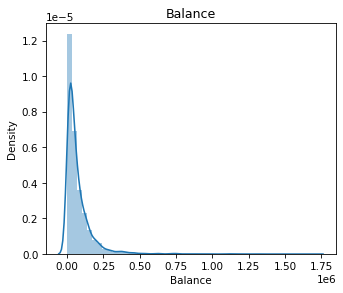

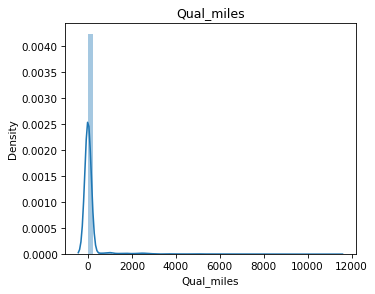

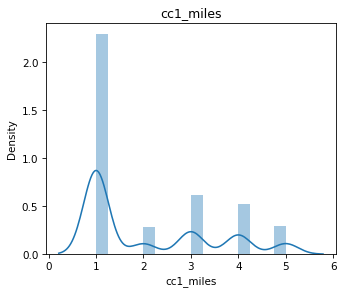

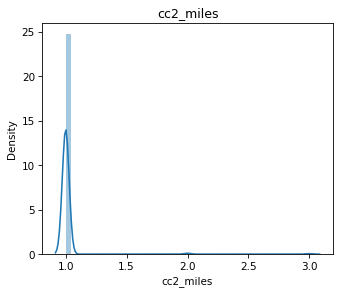

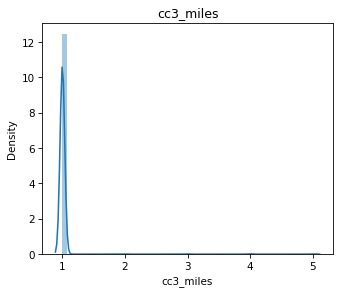

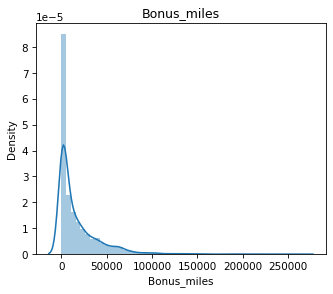

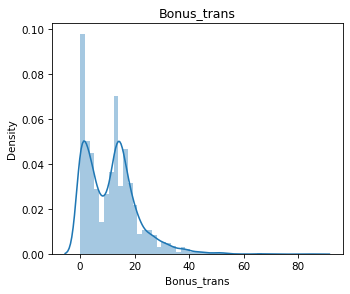

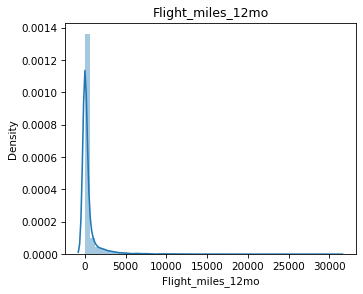

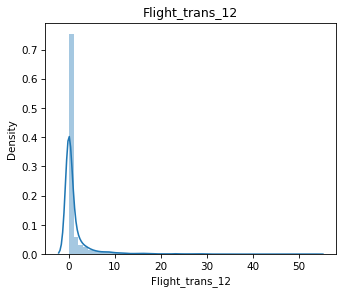

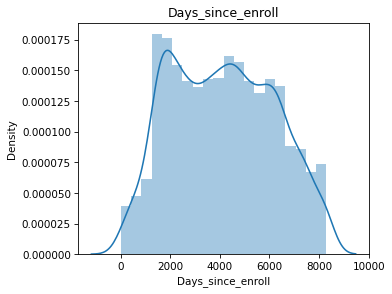

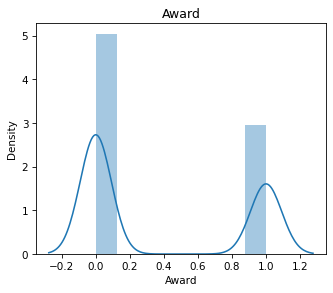

In [ ]:
plt.rcParams ['figure.figsize'] =(5, 4)
plt.rcParams ['figure.dpi'] = 75

for feature in df.columns:
  sns.distplot(df[feature])
  plt.title(feature)
  plt.show()

**2.2 Checking relationship between features**

In [ ]:
np.round(df.corr(), 3)

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
Balance              1.000       0.109      0.338     -0.009      0.035   
Qual_miles           0.109       1.000      0.008     -0.014     -0.008   
cc1_miles            0.338       0.008      1.000     -0.068      0.061   
cc2_miles           -0.009      -0.014     -0.068      1.000     -0.006   
cc3_miles            0.035      -0.008      0.061     -0.006      1.000   
Bonus_miles          0.403       0.031      0.825     -0.004      0.204   
Bonus_trans          0.325       0.051      0.609      0.064      0.097   
Flight_miles_12mo    0.218       0.127      0.037      0.011     -0.002   
Flight_trans_12      0.256       0.144      0.041      0.028     -0.001   
Days_since_enroll    0.263       0.017      0.231     -0.006      0.011   
Award                0.178       0.095      0.335      0.005      0.023   

                   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
Balance                  0.403        0.325              0.218   
Qual_miles               0.031        0.051              0.127   
cc1_miles                0.825        0.609              0.037   
cc2_miles               -0.004        0.064              0.011   
cc3_miles                0.204        0.097             -0.002   
Bonus_miles              1.000        0.603              0.184   
Bonus_trans              0.603        1.000              0.377   
Flight_miles_12mo        0.184        0.377              1.000   
Flight_trans_12          0.185        0.432              0.869   
Days_since_enroll        0.210        0.161              0.037   
Award                    0.374        0.334              0.218   

                   Flight_trans_12  Days_since_enroll  Award  
Balance                      0.256              0.263  0.178  
Qual_miles                   0.144              0.017  0.095  
cc1_miles                    0.041              0.231  0.335  
cc2_miles                    0.028             -0.006  0.005  
cc3_miles                   -0.001              0.011  0.023  
Bonus_miles                  0.185              0.210  0.374  
Bonus_trans                  0.432              0.161  0.334  
Flight_miles_12mo            0.869              0.037  0.218  
Flight_trans_12              1.000              0.059  0.248  
Days_since_enroll            0.059              1.000  0.188  
Award                        0.248              0.188  1.000

<Axes: >

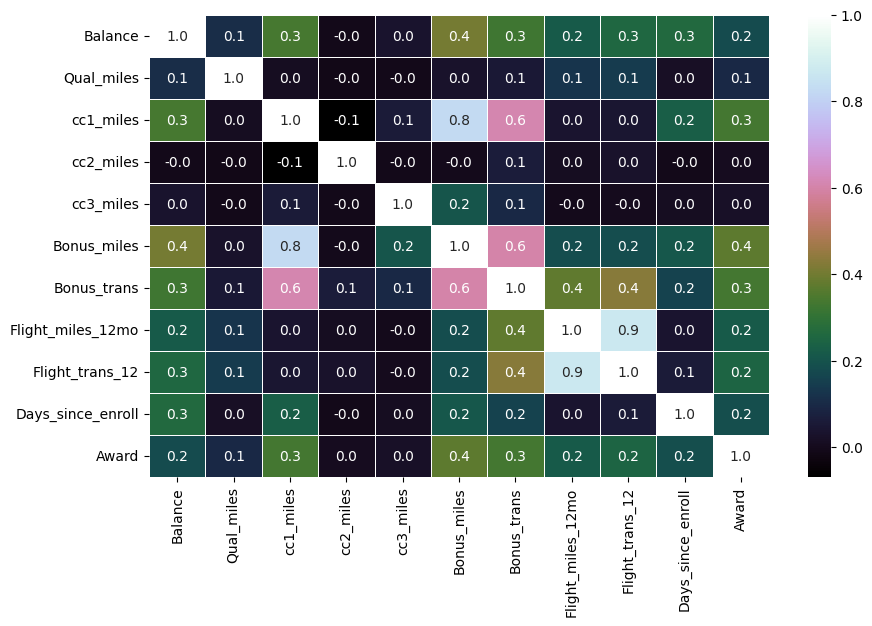

In [ ]:
plt.rcParams ['figure.figsize'] =(10, 6)
plt.rcParams ['figure.dpi'] = 100

sns.heatmap(df.corr(), fmt ='.1f', annot =True, linewidths =.5, cmap ='cubehelix')




*   flight_trans_12 is 90% positively correlated with flight_miles_12mo

*   bonus_trans is 60% positively correlated with bonus_miles


*   bonus_trans and bonus_miles are 80% and 60% positively correlated with cc1_miles

In other words, the following are positively correlated

*   Number of flight transactions in the past 12 months <-> Number of flight miles in the past 12 months
*   Amount of non-flight transactions <-> Miles passengers earn with the freq. flyer credit card

*   Number of non-flight bonus transactions <-> Miles passengers earn from non-flight bonus transactions

*   Miles passengers earn from non-flight bonus transactions <-> Miles passengers earn with the freq. flyer credit card



**2.3 Data Visualisation**

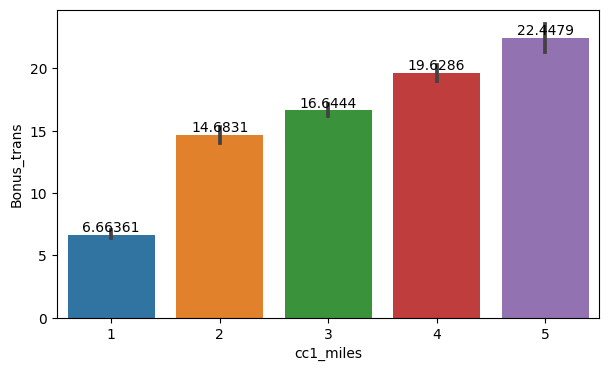

In [ ]:
#lets check how bonus transaction is related with cc1_mile(miles earned with freq.flyer credit card)
plt.rcParams ['figure.figsize'] =(7, 4)

sorted_data = df[['cc1_miles','Bonus_trans']].sort_values('Bonus_trans', ascending = False)
ax = sns.barplot(x=df['cc1_miles'], y='Bonus_trans', data= sorted_data)

plt.xlabel = 'Miles earned with freq. flyer credit card'
plt.ylabel= 'Non-flight bonus transactions'

for i in ax.containers:
    ax.bar_label(i,)

plt.show()

▶ ***People who fly more frequently (people who are using freq.flyer credit card) use bonus transactions more***

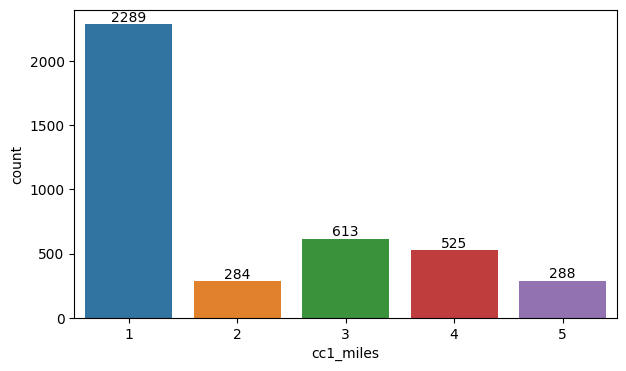

In [ ]:
ax = sns.countplot( x= df['cc1_miles'])

for i in ax.containers:
    ax.bar_label(i,)

plt.show()

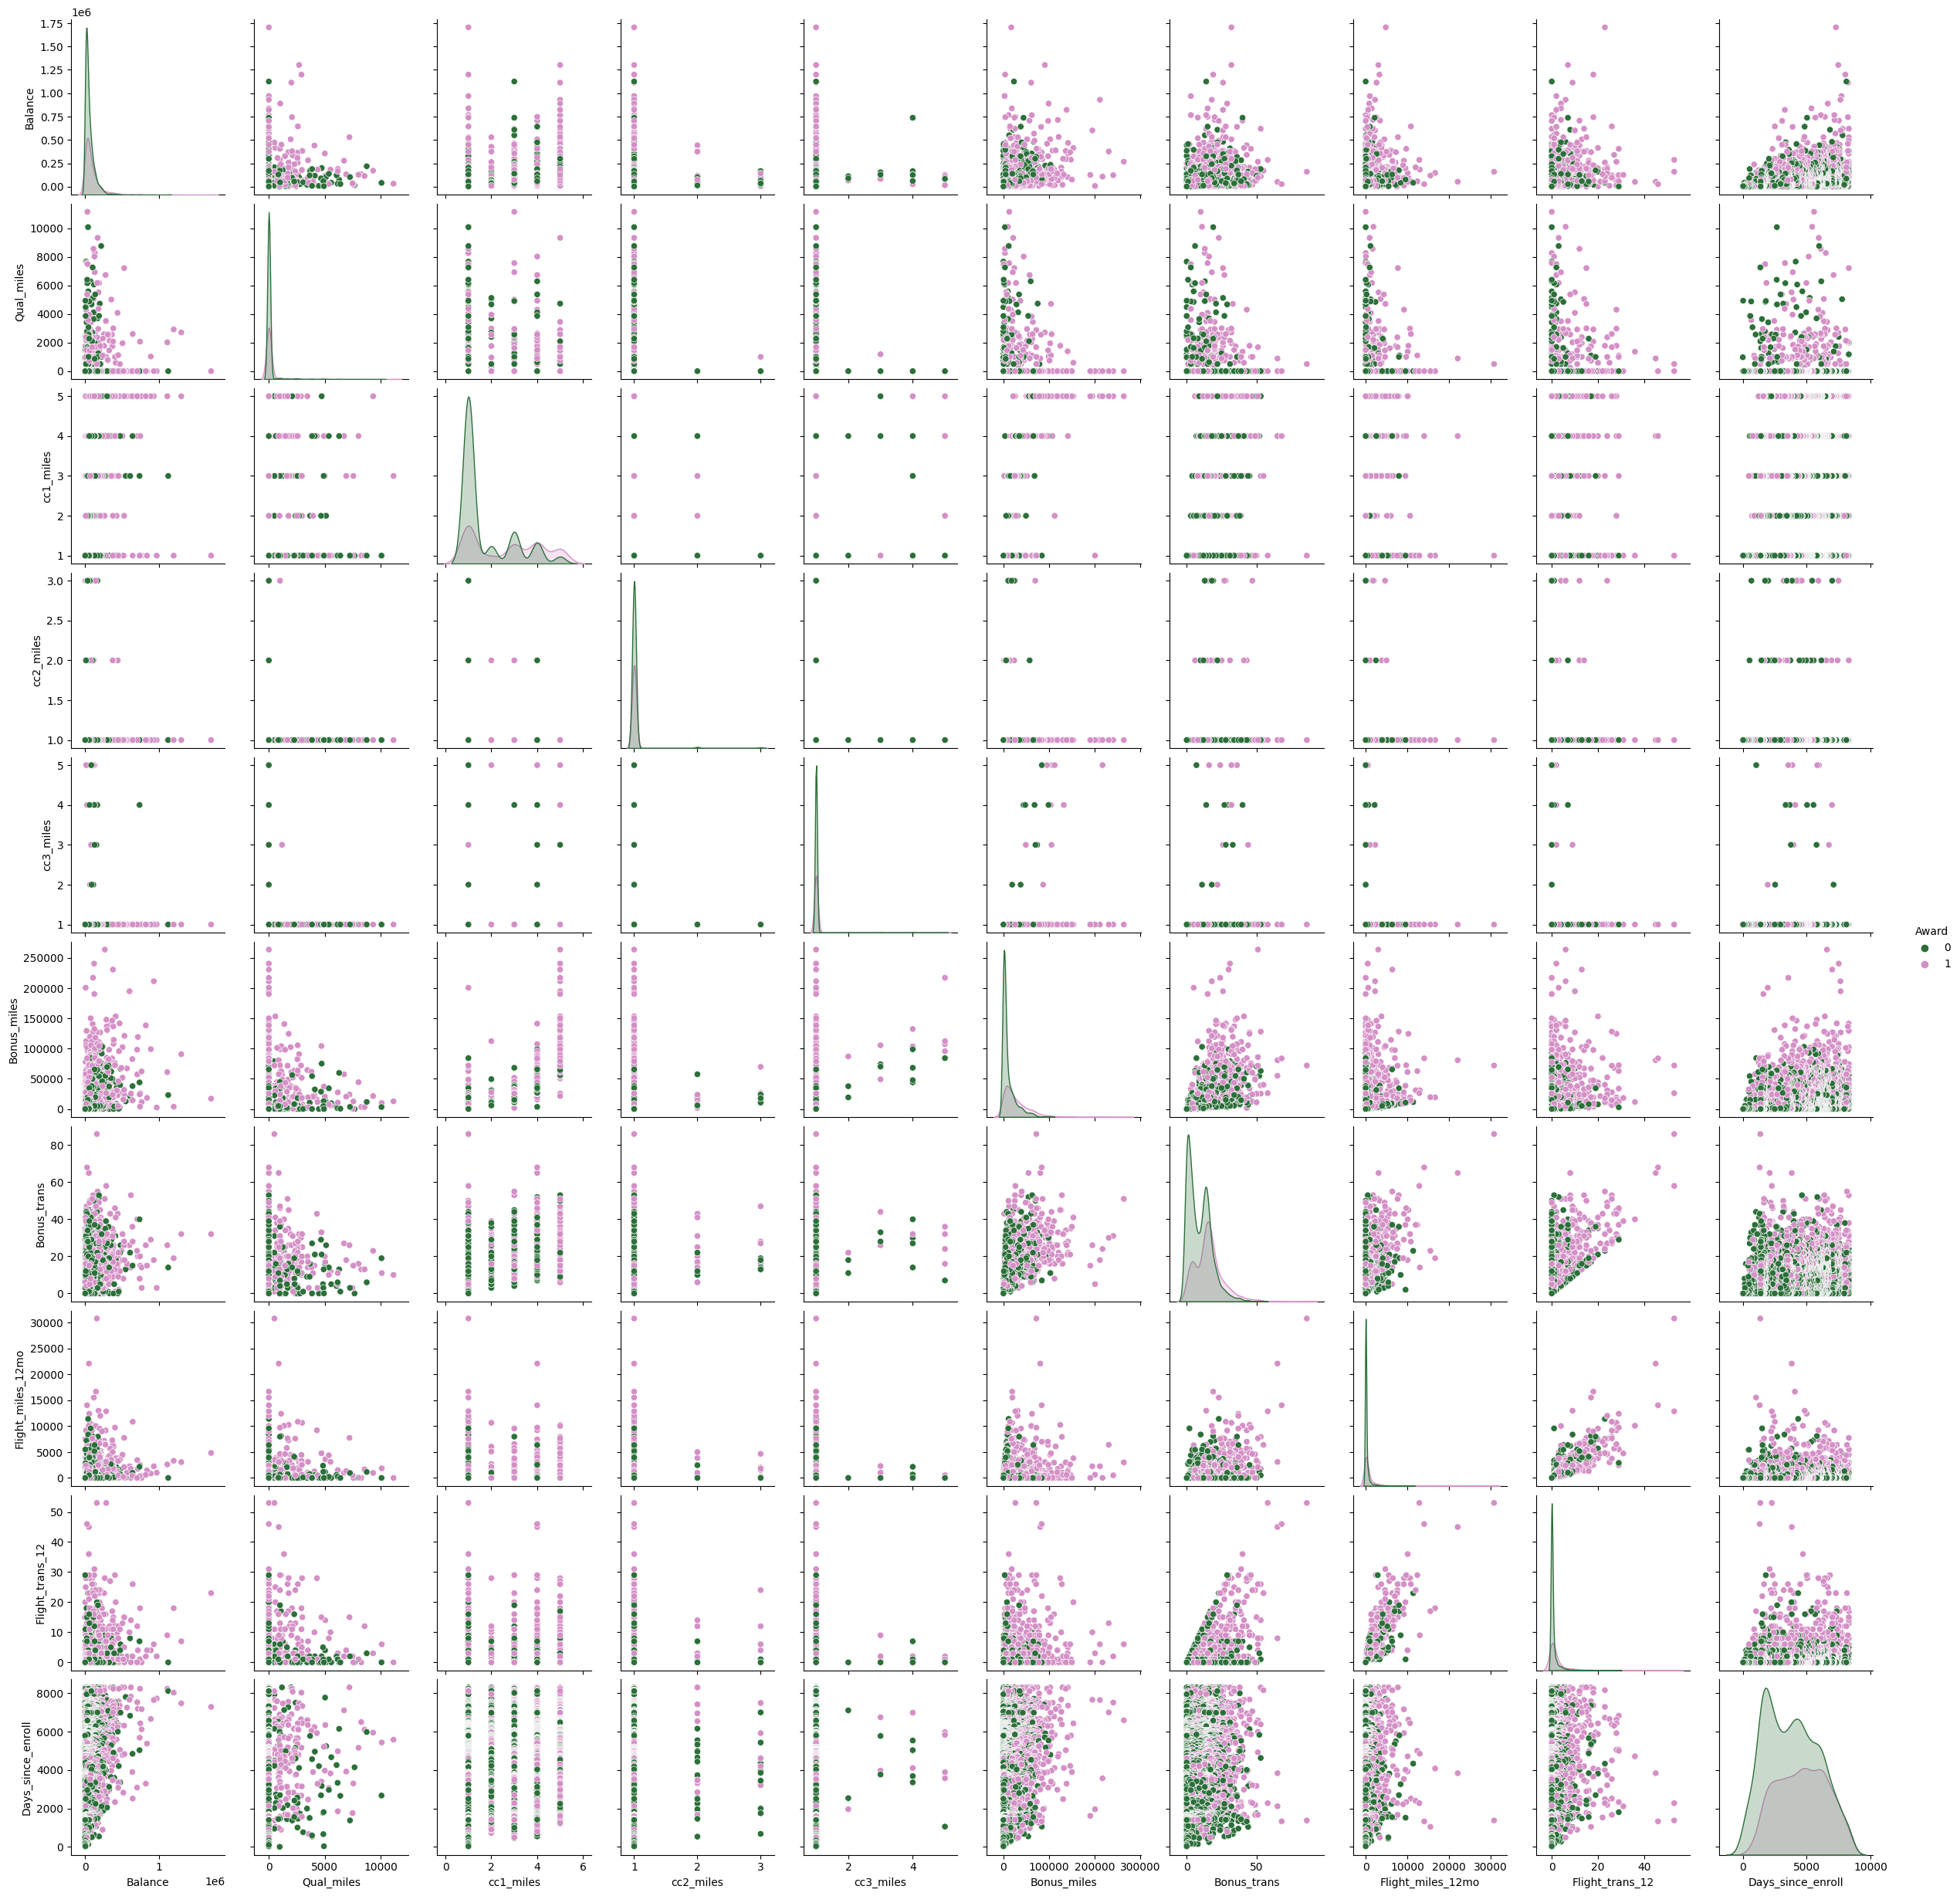

In [ ]:
sns.pairplot(df, hue = 'Award', palette= 'cubehelix')

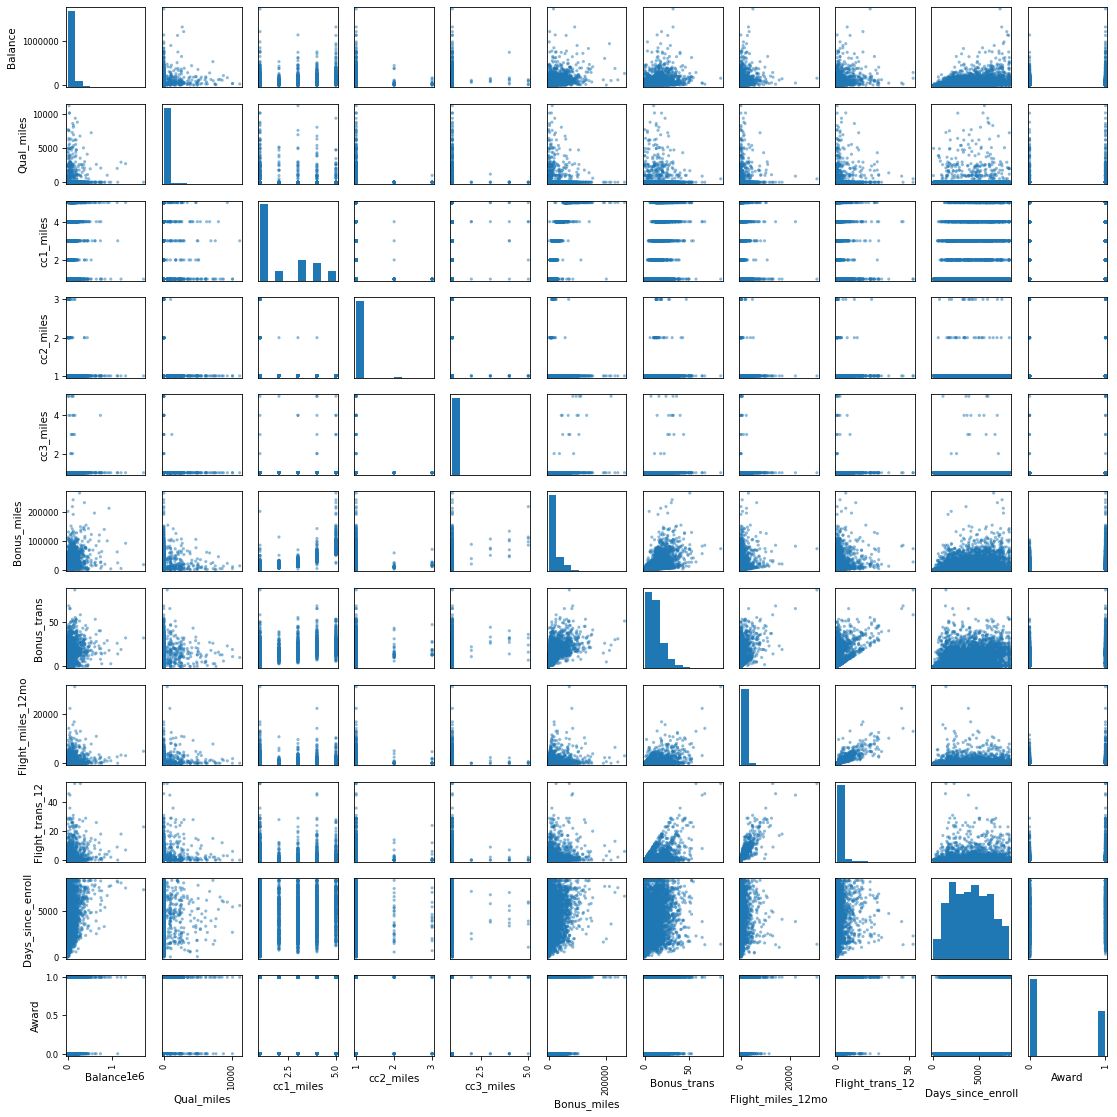

In [ ]:
plt.rcParams ['figure.figsize'] =(15, 15)
plt.rcParams ['figure.dpi'] = 75

pd.plotting.scatter_matrix(df)
plt.tight_layout()
plt.show()

In [ ]:
non_awarded_cx = len(df[df.Award == 0])
awarded_cx = len(df[df.Award == 1])
print('Percentage of Cx not having the award is', np.round(non_awarded_cx /(len(df.Award))*100, 2),'%')
print('Percentage of Cx having the award is', np.round(awarded_cx /(len(df.Award))*100, 2),'%')

Percentage of Cx not having the award is 62.97 %
Percentage of Cx having the award is 37.03 %


<Axes: xlabel='Award', ylabel='count'>

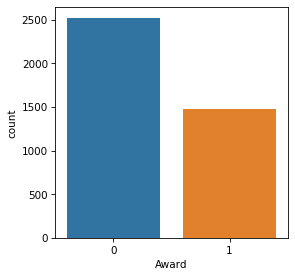

In [ ]:
plt.rcParams ['figure.figsize'] =(4,4)
plt.rcParams ['figure.dpi'] = 75

sns.countplot(x='Award', data=df)


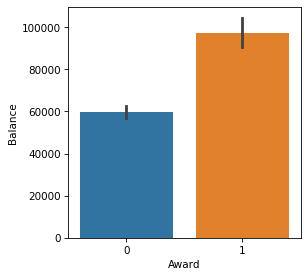

In [ ]:
# Balance : Number of miles eligible for award travel

ax = sns.barplot(x='Award', y='Balance', data= df)
ax.set(xlabel = 'Award', ylabel= 'Balance')

plt.show()

In [ ]:
# what is correlated with Balance?

corr_matrix = df.corr()
corr_matrix["Balance"].sort_values(ascending=False)

Balance              1.000000
Bonus_miles          0.403487
cc1_miles            0.338344
Bonus_trans          0.324935
Days_since_enroll    0.263129
Flight_trans_12      0.255700
Flight_miles_12mo    0.217551
Award                0.178494
Qual_miles           0.108722
cc3_miles            0.035243
cc2_miles           -0.008804
Name: Balance, dtype: float64

**2.4 Outlier Detection**

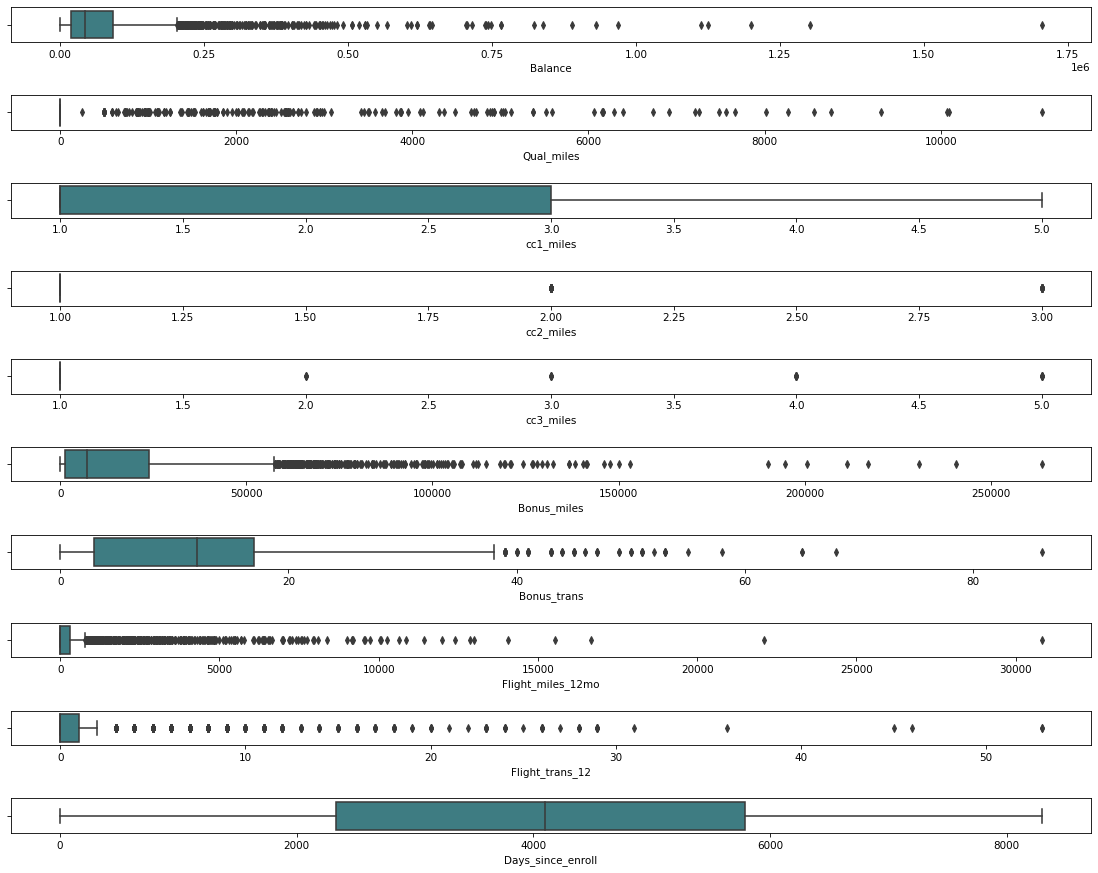

In [ ]:
from matplotlib import figure
ot = df.copy()
fig,axes = plt.subplots(10, 1, figsize=(15,12), sharex = False, sharey = False)
sns.boxplot(x= 'Balance', data = ot, palette ='crest', ax =axes[0])
sns.boxplot(x='Qual_miles',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='cc1_miles',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='cc2_miles',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='cc3_miles',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='Bonus_miles',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='Bonus_trans',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='Flight_miles_12mo',data=ot,palette='crest',ax=axes[7])
sns.boxplot(x='Flight_trans_12',data=ot,palette='crest',ax=axes[8])
sns.boxplot(x='Days_since_enroll',data=ot,palette='crest',ax=axes[9])
plt.tight_layout(pad=2.0)

<Axes: >

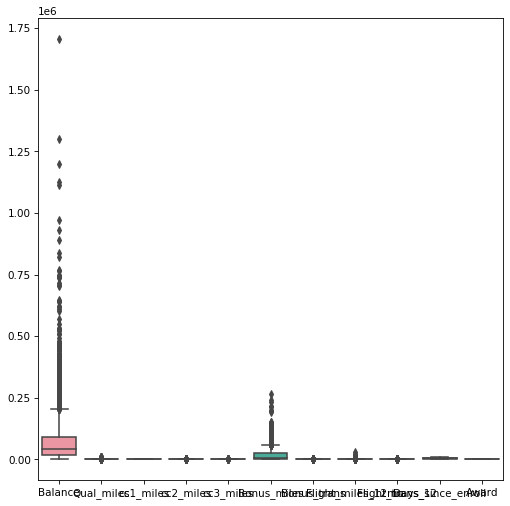

In [ ]:
# Box plot for every feature in the same graph
plt.rcParams ['figure.figsize'] =(8, 8)
sns.boxplot(data=df)

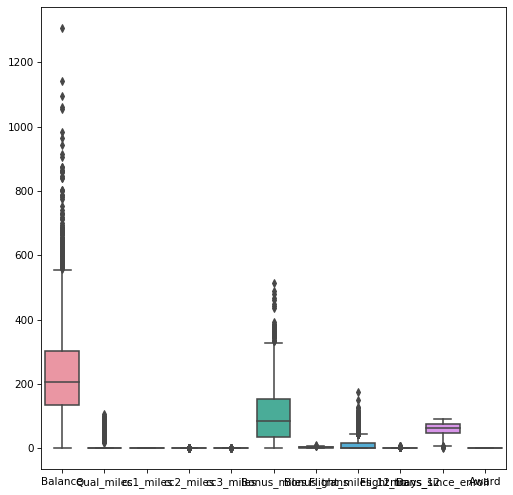

In [ ]:
# we use sqrt() to see more clearly despite the outliers

sns.boxplot(data=np.sqrt(df))
plt.show()

# **Step 3: Data Preprocessing**




*   In **clustering**, we always deal with distances, so feature scaling is **mandatory**


In [ ]:
df.head(2)

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    28143           0          1          1          1          174   
1    19244           0          1          1          1          215   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award  
0            1                  0                0               7000      0  
1            2                  0                0               6968      0

**Feature Scaling**


In [ ]:
# Data Transformation
#Standardization

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

std_df = sc.fit_transform(df)
std_df

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [ ]:
std_df = pd.DataFrame(std_df, columns = df.columns)
std_df.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0 -0.451141   -0.186299  -0.769578  -0.098242  -0.062767    -0.702786   
1 -0.539457   -0.186299  -0.769578  -0.098242  -0.062767    -0.701088   
2 -0.320031   -0.186299  -0.769578  -0.098242  -0.062767    -0.539253   
3 -0.583799   -0.186299  -0.769578  -0.098242  -0.062767    -0.689286   
4  0.239678   -0.186299   1.409471  -0.098242  -0.062767     1.083121   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0    -1.104065          -0.328603        -0.362168           1.395454   
1    -0.999926          -0.328603        -0.362168           1.379957   
2    -0.791649          -0.328603        -0.362168           1.411920   
3    -1.104065          -0.328603        -0.362168           1.372208   
4     1.499394           1.154932         0.692490           1.363975   

      Award  
0 -0.766919  
1 -0.766919  
2 -0.766919  
3 -0.766919  
4  1.303918

As we can see, the data is scaled down.

In [ ]:
#Normalization
# Using Minmaxscaler for accuracy result compariso

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
norm_df = minmax.fit_transform(df)

norm_df = pd.DataFrame(norm_df, columns = df.columns)
norm_df.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0  0.016508         0.0       0.00        0.0        0.0     0.000660   
1  0.011288         0.0       0.00        0.0        0.0     0.000815   
2  0.024257         0.0       0.00        0.0        0.0     0.015636   
3  0.008667         0.0       0.00        0.0        0.0     0.001896   
4  0.057338         0.0       0.75        0.0        0.0     0.164211   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award  
0     0.011628           0.000000         0.000000           0.843742    0.0  
1     0.023256           0.000000         0.000000           0.839884    0.0  
2     0.046512           0.000000         0.000000           0.847842    0.0  
3     0.011628           0.000000         0.000000           0.837955    0.0  
4     0.302326           0.067398         0.075472           0.835905    1.0

# **Step 4: Model Building (Performing Clustering)**

# ***Hierachical Clustering***


*   Creation of linkage and dendrogram


In [ ]:
plt.rcParams['figure.figsize'] = (20,6)
plt.rcParams['figure.dpi'] = 75

Text(0.5, 1.0, 'Visualising the Standardized data, Method- Single')

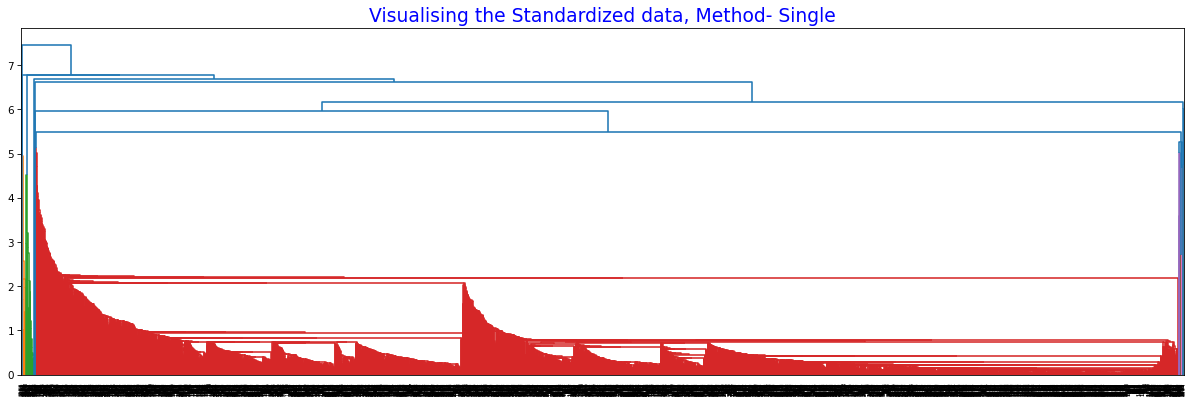

In [ ]:
from scipy.cluster import hierarchy
lk = hierarchy.linkage(std_df, method = 'single')
dendrogram = hierarchy.dendrogram (lk)

plt.title('Visualising the Standardized data, Method- Single', fontsize = 18, fontweight = 16, color ='blue')

Text(0.5, 1.0, 'Visualising the Standardized data, Method- Complete')

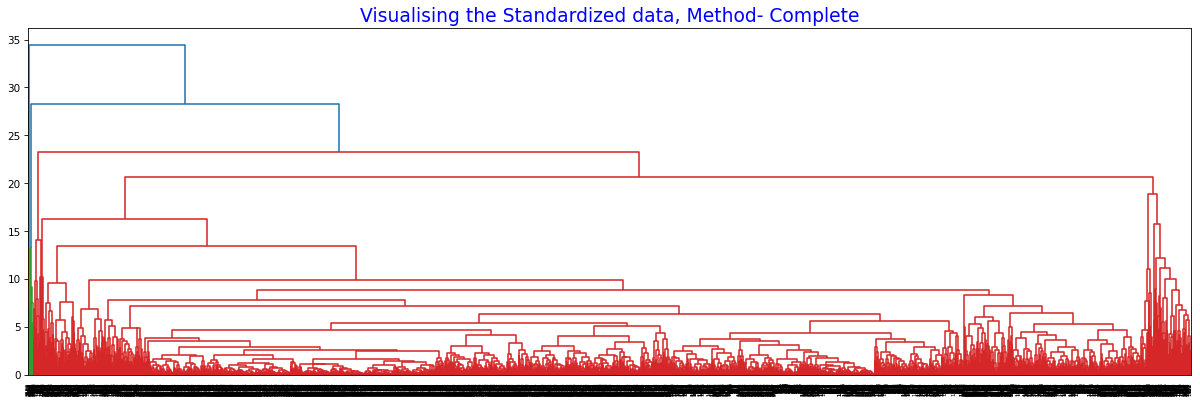

In [ ]:
from scipy.cluster import hierarchy
lk = hierarchy.linkage(std_df, method = 'complete')
dendrogram = hierarchy.dendrogram (lk)

plt.title('Visualising the Standardized data, Method- Complete', fontsize = 18, fontweight = 16, color ='blue')

Text(0.5, 1.0, 'Visualising the Standardized data, Method- Median')

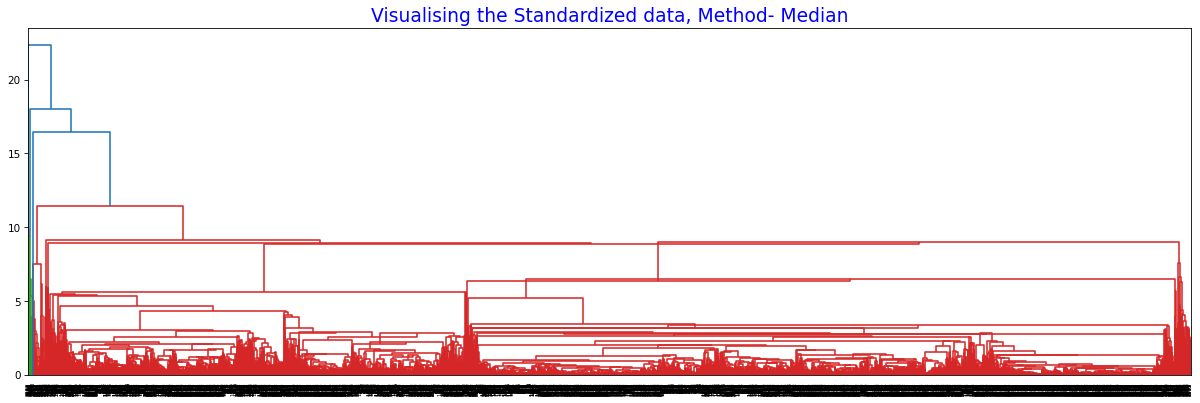

In [ ]:
from scipy.cluster import hierarchy
lk = hierarchy.linkage(std_df, method = 'median')
dendrogram = hierarchy.dendrogram (lk)

plt.title('Visualising the Standardized data, Method- Median', fontsize = 18, fontweight = 16, color ='blue')

Text(0.5, 1.0, 'Visualising the Standardized data, Method- Centroid')

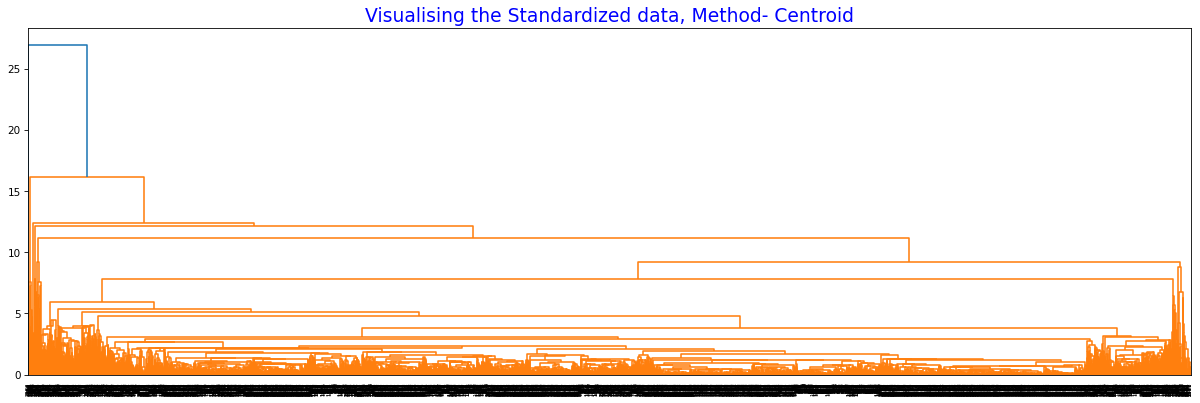

In [ ]:
from scipy.cluster import hierarchy
lk = hierarchy.linkage(std_df, method = 'centroid')
dendrogram = hierarchy.dendrogram (lk)

plt.title('Visualising the Standardized data, Method- Centroid', fontsize = 18, fontweight = 16, color ='blue')

Text(0.5, 1.0, 'Visualising the Standardized data, Method- Ward')

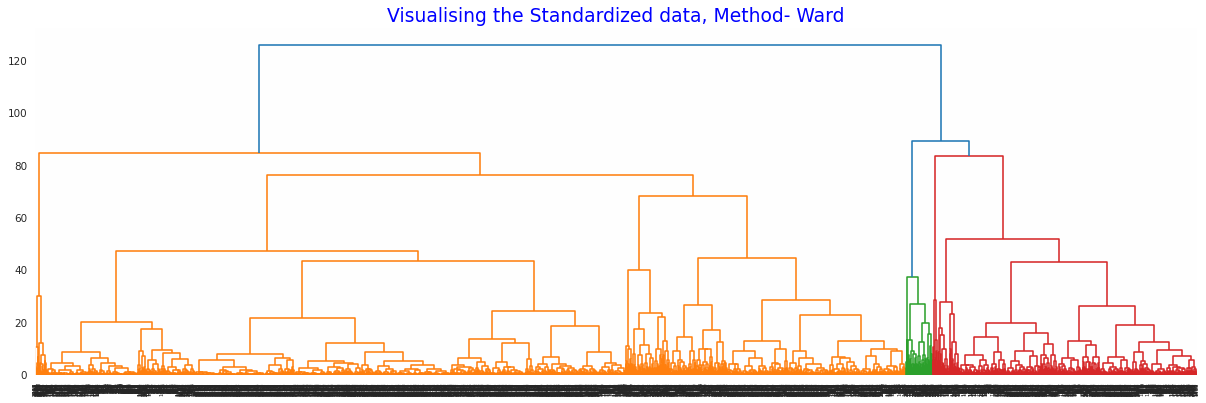

In [ ]:
from scipy.cluster import hierarchy
lk = hierarchy.linkage(std_df, method = 'ward')
dendrogram = hierarchy.dendrogram (lk)

plt.title('Visualising the Standardized data, Method- Ward', fontsize = 18, fontweight = 16, color ='blue')

Clusters don't seem to be formed firmly, lets use noramlized data instead of standardised one and try.

Text(0.5, 1.0, 'Visualising the Normalized data, Method- Single')

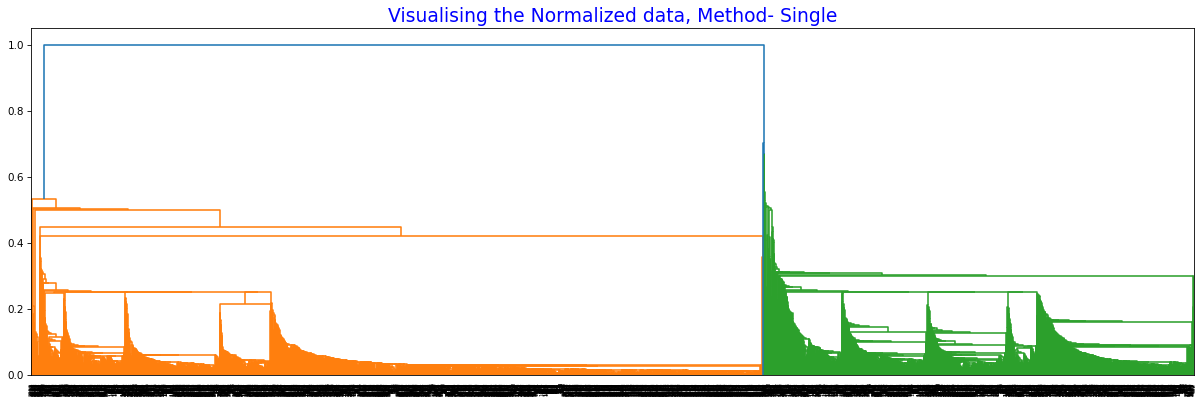

In [ ]:
from scipy.cluster import hierarchy
lk = hierarchy.linkage(norm_df, method = 'single')
dendrogram = hierarchy.dendrogram (lk)

plt.title('Visualising the Normalized data, Method- Single', fontsize = 18, fontweight = 16, color ='blue')

Text(0.5, 1.0, 'Visualising the Normalized data, Method- Complete')

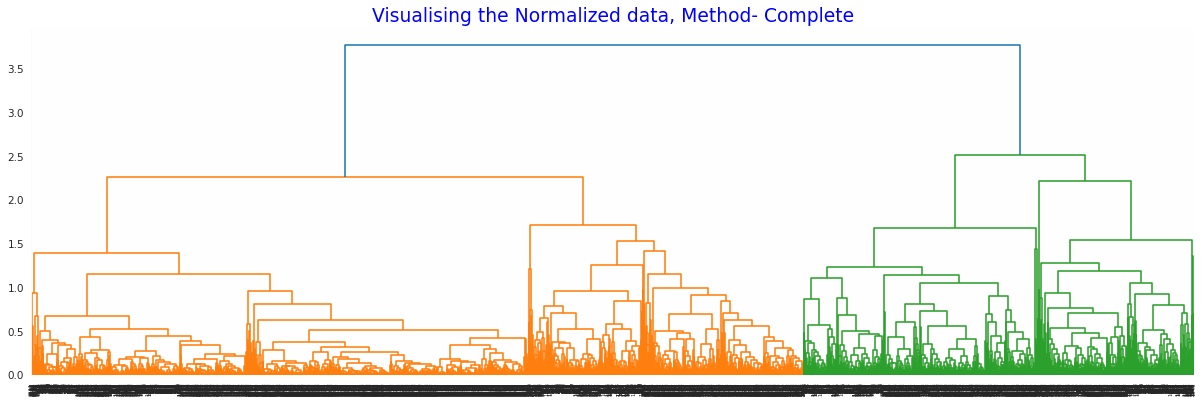

In [ ]:
from scipy.cluster import hierarchy
lk = hierarchy.linkage(norm_df, method = 'complete')
dendrogram = hierarchy.dendrogram (lk)

plt.title('Visualising the Normalized data, Method- Complete', fontsize = 18, fontweight = 16, color ='blue')

Text(0.5, 1.0, 'Visualising the Normalized data, Method- Median')

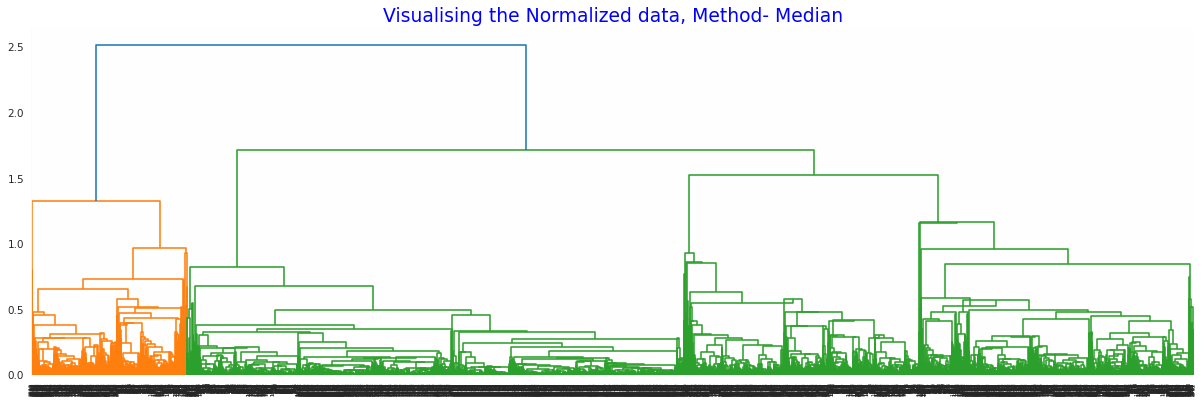

In [ ]:
from scipy.cluster import hierarchy
lk = hierarchy.linkage(norm_df, method = 'median')
dendrogram = hierarchy.dendrogram (lk)

plt.title('Visualising the Normalized data, Method- Median', fontsize = 18, fontweight = 16, color ='blue')

Text(0.5, 1.0, 'Visualising the Normalized data, Method- Centroid')

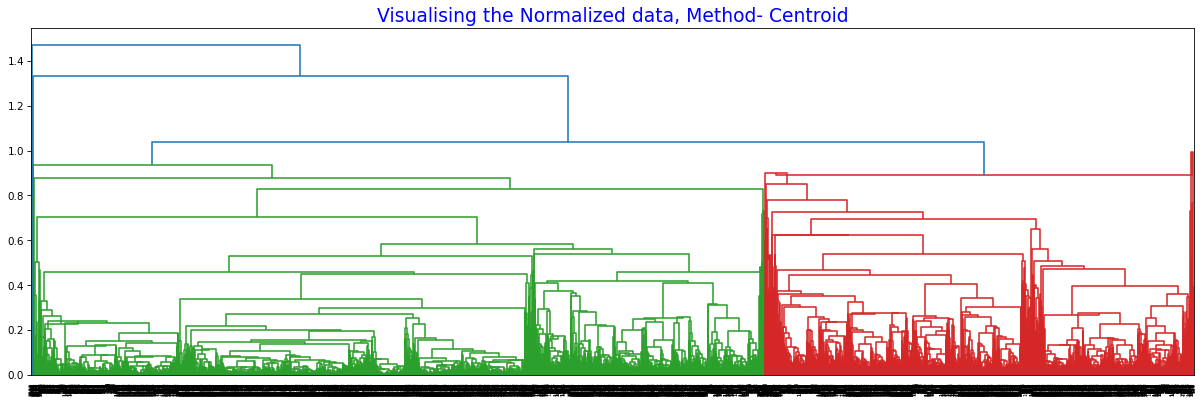

In [ ]:
from scipy.cluster import hierarchy
lk = hierarchy.linkage(norm_df, method = 'centroid')
dendrogram = hierarchy.dendrogram (lk)

plt.title('Visualising the Normalized data, Method- Centroid', fontsize = 18, fontweight = 16, color ='blue')

Text(0.5, 1.0, 'Visualising the Normalized data, Method- Ward')

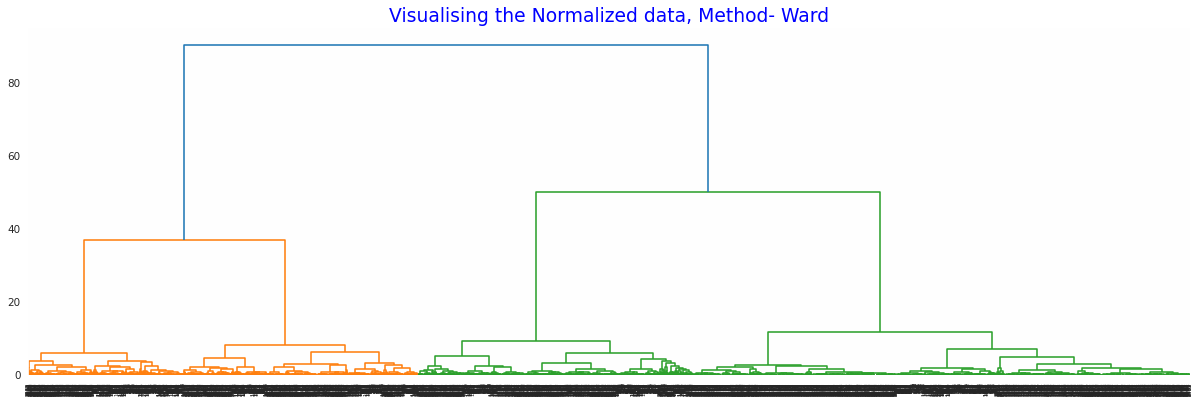

In [ ]:
from scipy.cluster import hierarchy
lk = hierarchy.linkage(norm_df, method = 'ward')
dendrogram = hierarchy.dendrogram (lk)

plt.title('Visualising the Normalized data, Method- Ward', fontsize = 18, fontweight = 16, color ='blue')

▶ As we can see, the dendogram cluster formed by the normalised data in ward linkage seems better than any other dendograms. So lets fix this. 

Text(0.5, 1.0, 'Visualising the Normalized data, Method- Ward')

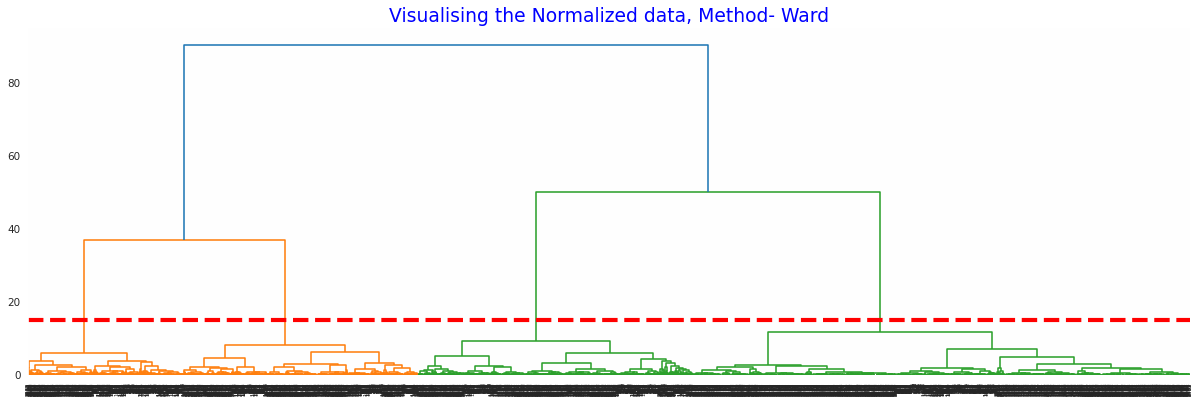

In [ ]:
from scipy.cluster import hierarchy
lk = hierarchy.linkage(norm_df, method = 'ward')
dendrogram = hierarchy.dendrogram (lk)
plt.axhline (y = 15, color = 'r', linestyle = '--', linewidth = 4)

plt.title('Visualising the Normalized data, Method- Ward', fontsize = 18, fontweight = 16, color ='blue')

**Model Building - Agglomerative Clustering**


In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering (n_clusters= 4, affinity = 'euclidean', linkage = 'ward')

cluster = hc.fit_predict(norm_df)
cluster

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
#Adding these clusters nums to df

df['Cluster_HC'] = cluster

In [ ]:
df.head(2)

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    28143           0          1          1          1          174   
1    19244           0          1          1          1          215   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award  \
0            1                  0                0               7000      0   
1            2                  0                0               6968      0   

   Cluster_HC  
0           0  
1           0

In [ ]:
df.groupby('Cluster_HC').agg('mean')

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
Cluster_HC                                                               
0            37876.890058   52.797076   1.000000   1.019883   1.000585   
1            79848.233615  285.097252   1.699789   1.024313   1.000000   
2           106221.111386  161.262376   3.198020   1.001238   1.025990   
3           127475.028037  160.801869   4.362617   1.000000   1.050467   

             Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
Cluster_HC                                                                  
0            2558.508187     5.730994         239.314035         0.697076   
1           12079.774841    12.133192         781.939746         2.369979   
2           26458.257426    16.363861         198.733911         0.558168   
3           58656.919626    22.235514         991.110280         3.005607   

            Days_since_enroll  Award  
Cluster_HC                            
0                 3562.376608    0.0  
1                 4372.173362    1.0  
2                 4367.250000    0.0  
3                 5072.226168    1.0

In [ ]:
df.describe()

Balance    Qual_miles    cc1_miles    cc2_miles    cc3_miles  \
count  3.999000e+03   3999.000000  3999.000000  3999.000000  3999.000000   
mean   7.360133e+04    144.114529     2.059515     1.014504     1.012253   
std    1.007757e+05    773.663804     1.376919     0.147650     0.195241   
min    0.000000e+00      0.000000     1.000000     1.000000     1.000000   
25%    1.852750e+04      0.000000     1.000000     1.000000     1.000000   
50%    4.309700e+04      0.000000     1.000000     1.000000     1.000000   
75%    9.240400e+04      0.000000     3.000000     1.000000     1.000000   
max    1.704838e+06  11148.000000     5.000000     3.000000     5.000000   

         Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count    3999.000000   3999.00000        3999.000000      3999.000000   
mean    17144.846212     11.60190         460.055764         1.373593   
std     24150.967826      9.60381        1400.209171         3.793172   
min         0.000000      0.00000           0.000000         0.000000   
25%      1250.000000      3.00000           0.000000         0.000000   
50%      7171.000000     12.00000           0.000000         0.000000   
75%     23800.500000     17.00000         311.000000         1.000000   
max    263685.000000     86.00000       30817.000000        53.000000   

       Days_since_enroll        Award   Cluster_HC  
count         3999.00000  3999.000000  3999.000000  
mean          4118.55939     0.370343     1.042011  
std           2065.13454     0.482957     1.078572  
min              2.00000     0.000000     0.000000  
25%           2330.00000     0.000000     0.000000  
50%           4096.00000     0.000000     1.000000  
75%           5790.50000     1.000000     2.000000  
max           8296.00000     1.000000     3.000000

In [ ]:
print(df[df.Cluster_HC == 0].shape)
print(df[df.Cluster_HC == 1].shape)
print(df[df.Cluster_HC == 2].shape)
print(df[df.Cluster_HC == 3].shape)

(1710, 12)
(946, 12)
(808, 12)
(535, 12)


✈ ***Visualizing the clusters formed:***

<Axes: xlabel='Cluster_HC', ylabel='Balance'>

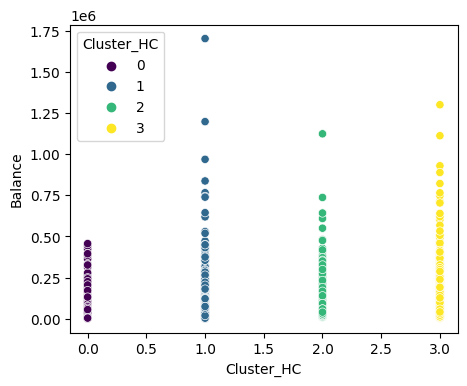

In [ ]:
plt.rcParams ['figure.figsize'] =(5,4)
plt.rcParams ['figure.dpi'] = 100

sns.scatterplot(x = 'Cluster_HC', y = 'Balance', data=df, hue = 'Cluster_HC', palette = 'viridis' )

<Axes: xlabel='Cluster_HC', ylabel='cc1_miles'>

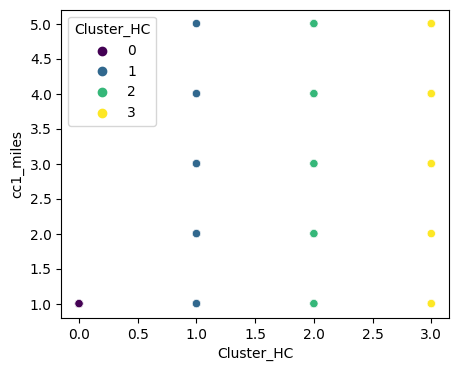

In [ ]:
sns.scatterplot(x = 'Cluster_HC', y = 'cc1_miles', data =df, hue = 'Cluster_HC', palette = 'viridis' )

<Axes: xlabel='Cluster_HC', ylabel='Bonus_trans'>

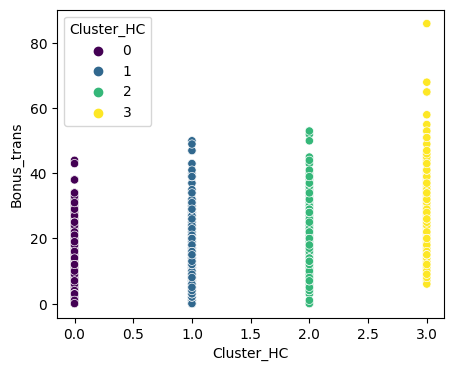

In [ ]:
sns.scatterplot(x = 'Cluster_HC', y = 'Bonus_trans', data =df, hue = 'Cluster_HC', palette = 'viridis' )

<Axes: xlabel='Cluster_HC', ylabel='Flight_trans_12'>

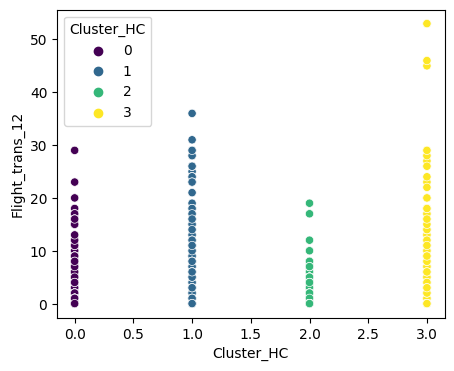

In [ ]:
sns.scatterplot(x = 'Cluster_HC', y = 'Flight_trans_12', data =df, hue = 'Cluster_HC', palette = 'viridis' )

<Axes: xlabel='Cluster_HC', ylabel='Days_since_enroll'>

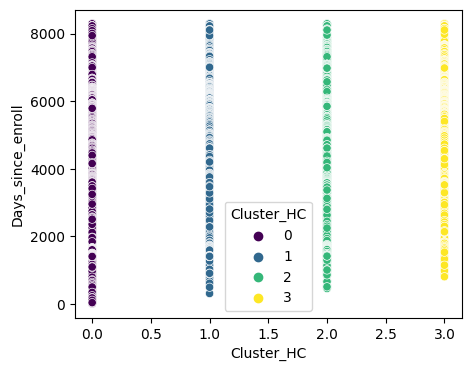

In [ ]:
sns.scatterplot(x = 'Cluster_HC', y = 'Days_since_enroll', data =df, hue = 'Cluster_HC', palette = 'viridis' )

<Axes: xlabel='Cluster_HC', ylabel='Award'>

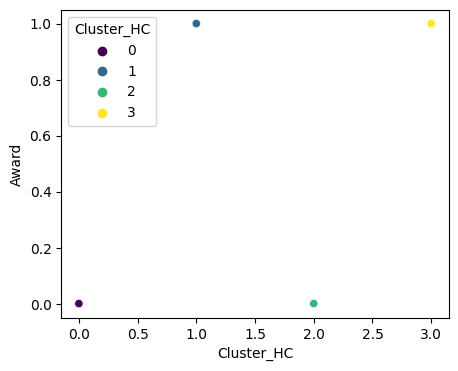

In [ ]:
sns.scatterplot(x = 'Cluster_HC', y = 'Award', data =df, hue = 'Cluster_HC', palette = 'viridis' )

<Axes: xlabel='Balance', ylabel='Bonus_trans'>

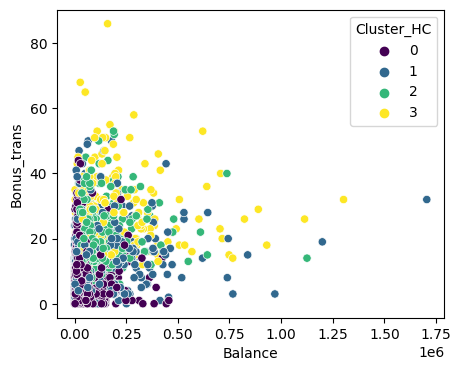

In [ ]:
sns.scatterplot(x = 'Balance', y = 'Bonus_trans', data =df, hue = 'Cluster_HC', palette = 'viridis')

<Axes: xlabel='Balance', ylabel='Bonus_miles'>

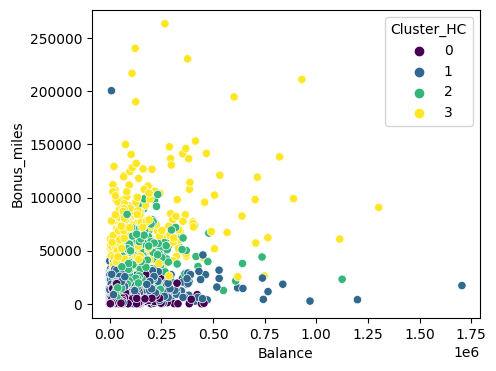

In [ ]:
sns.scatterplot(x = 'Balance', y = 'Bonus_miles', data =df, hue = 'Cluster_HC', palette = 'viridis' )

<Axes: xlabel='Bonus_trans', ylabel='Flight_trans_12'>

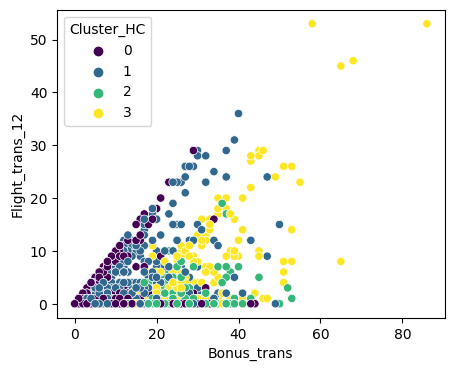

In [ ]:
sns.scatterplot(x = 'Bonus_trans', y = 'Flight_trans_12', data =df, hue = 'Cluster_HC', palette = 'viridis' )

<Axes: xlabel='Bonus_miles', ylabel='Flight_trans_12'>

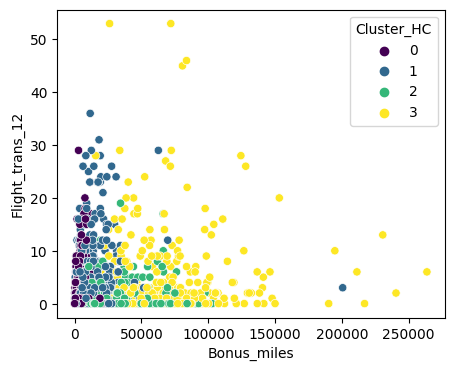

In [ ]:
sns.scatterplot(x = 'Bonus_miles', y = 'Flight_trans_12', data =df, hue = 'Cluster_HC', palette = 'viridis' )

# ***K Means Clustering***

In [ ]:
from sklearn.cluster import KMeans
km = KMeans()    #default n_cluster formed will be 8 clusters
cluster_km = km.fit_predict(std_df)  #using standardized data
cluster_km

array([2, 2, 2, ..., 7, 2, 2], dtype=int32)

***Elbow Graph***

In [ ]:
wcss = []

for i in range(1,10):
  km = KMeans(n_clusters = i)
  km.fit_predict(std_df)
  wcss.append(km.inertia_)   #wcss is also called as inertia

In [ ]:
wcss

[43989.000000000015,
 35409.51662986132,
 30899.220474104113,
 27161.489060223852,
 23706.569465129112,
 21470.889882561125,
 18893.59434829802,
 17316.782055953943,
 15966.338035760169]

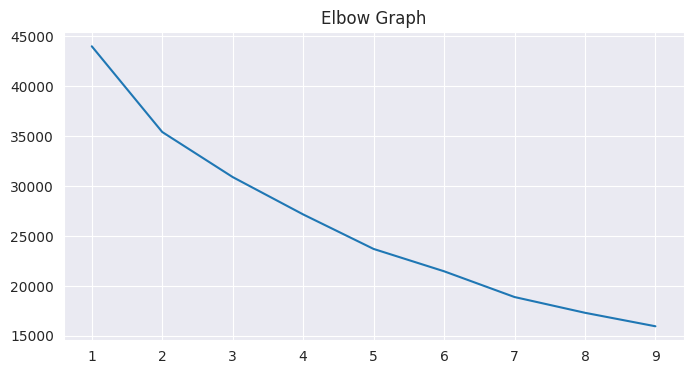

In [ ]:
plt.rcParams ['figure.figsize'] =(8,4)
plt.rcParams ['figure.dpi'] = 100
sns.set_style('darkgrid')

plt.plot(range(1,10), wcss)
plt.title('Elbow Graph')
plt.xlabel = 'K Value'
plt.ylabel = 'WCSS'
plt.show()

As we can see, there seems to be turn at 2 and 5. So, lets try the K=2 & K=5

In [ ]:
#k=2

from sklearn.cluster import KMeans
km = KMeans(n_clusters= 2)
cluster1 = km.fit_predict(std_df)            
cluster1

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
std_df['Cluster_KM'] = cluster1
std_df.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0 -0.451141   -0.186299  -0.769578  -0.098242  -0.062767    -0.702786   
1 -0.539457   -0.186299  -0.769578  -0.098242  -0.062767    -0.701088   
2 -0.320031   -0.186299  -0.769578  -0.098242  -0.062767    -0.539253   
3 -0.583799   -0.186299  -0.769578  -0.098242  -0.062767    -0.689286   
4  0.239678   -0.186299   1.409471  -0.098242  -0.062767     1.083121   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0    -1.104065          -0.328603        -0.362168           1.395454   
1    -0.999926          -0.328603        -0.362168           1.379957   
2    -0.791649          -0.328603        -0.362168           1.411920   
3    -1.104065          -0.328603        -0.362168           1.372208   
4     1.499394           1.154932         0.692490           1.363975   

      Award  Cluster_KM  
0 -0.766919           0  
1 -0.766919           0  
2 -0.766919           0  
3 -0.766919           0  
4  1.303918           1

In [ ]:
km.cluster_centers_

array([[-0.28377998, -0.07090394, -0.54434531,  0.01481909, -0.06086653,
        -0.48570121, -0.44172756, -0.17513227, -0.19493257, -0.19221198,
        -0.33831125],
       [ 0.58716103,  0.1467053 ,  1.1262893 , -0.03066175,  0.1259372 ,
         1.00495046,  0.91396585,  0.36236117,  0.40332941,  0.3977003 ,
         0.69999012]])

<Axes: xlabel='Balance', ylabel='Bonus_trans'>

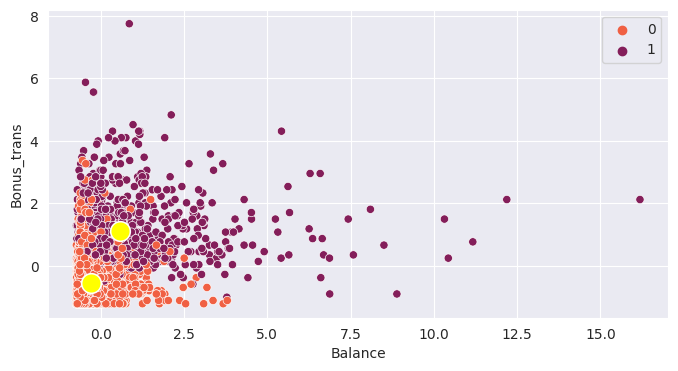

In [ ]:
sns.scatterplot(x = 'Balance', y = 'Bonus_trans', data = std_df, hue = 'Cluster_KM', palette ='rocket_r')
sns.scatterplot( x= km.cluster_centers_[:,0], y = km.cluster_centers_[:,2], c = 'yellow', s = 200)


<Axes: xlabel='Bonus_miles', ylabel='Bonus_trans'>

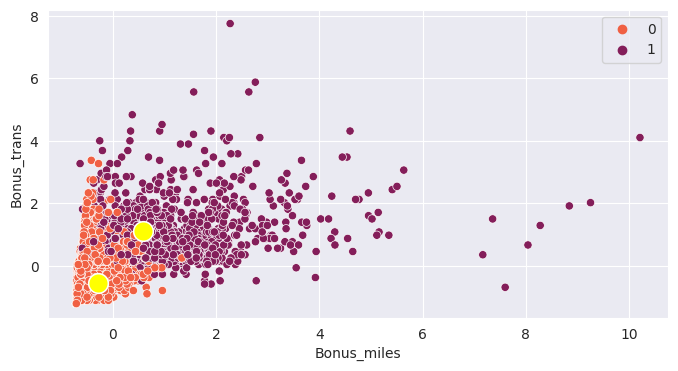

In [ ]:
sns.scatterplot(x = 'Bonus_miles', y = 'Bonus_trans', data = std_df, hue = 'Cluster_KM', palette ='rocket_r')
sns.scatterplot( x= km.cluster_centers_[:,0], y = km.cluster_centers_[:,2], c = 'yellow', s = 200)


<Axes: xlabel='Flight_trans_12', ylabel='Bonus_trans'>

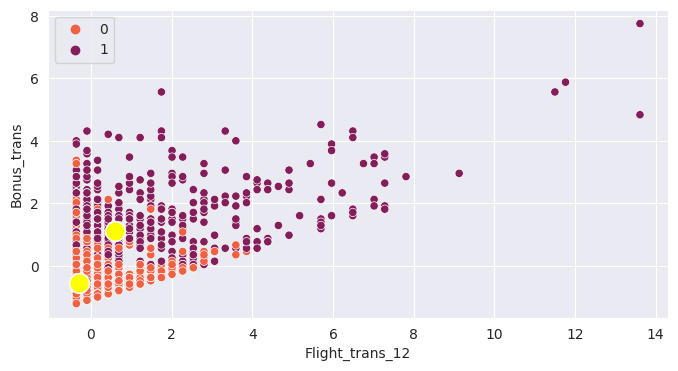

In [ ]:
sns.scatterplot(x = 'Flight_trans_12', y = 'Bonus_trans', data = std_df, hue = 'Cluster_KM', palette ='rocket_r')
sns.scatterplot( x= km.cluster_centers_[:,0], y = km.cluster_centers_[:,2], c = 'yellow', s = 200)


<Axes: xlabel='cc1_miles', ylabel='Bonus_trans'>

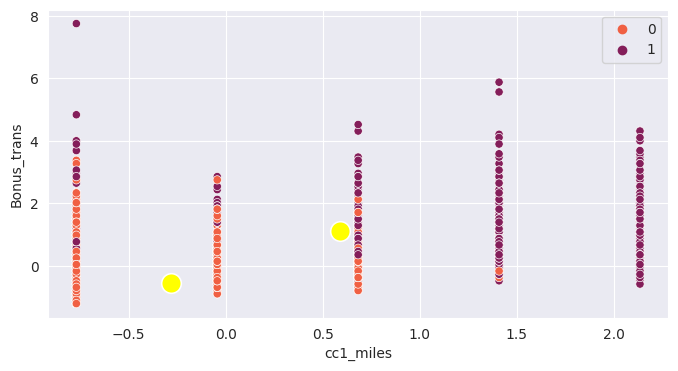

In [ ]:
sns.scatterplot(x = 'cc1_miles', y = 'Bonus_trans', data = std_df, hue = 'Cluster_KM', palette ='rocket_r')
sns.scatterplot( x= km.cluster_centers_[:,0], y = km.cluster_centers_[:,2], c = 'yellow', s = 200)


In [ ]:
#k=5

from sklearn.cluster import KMeans
km = KMeans(n_clusters= 5)
cluster2 = km.fit_predict(std_df)            
cluster2

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
std_df['Cluster_KM1'] = cluster2
std_df.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0 -0.451141   -0.186299  -0.769578  -0.098242  -0.062767    -0.702786   
1 -0.539457   -0.186299  -0.769578  -0.098242  -0.062767    -0.701088   
2 -0.320031   -0.186299  -0.769578  -0.098242  -0.062767    -0.539253   
3 -0.583799   -0.186299  -0.769578  -0.098242  -0.062767    -0.689286   
4  0.239678   -0.186299   1.409471  -0.098242  -0.062767     1.083121   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0    -1.104065          -0.328603        -0.362168           1.395454   
1    -0.999926          -0.328603        -0.362168           1.379957   
2    -0.791649          -0.328603        -0.362168           1.411920   
3    -1.104065          -0.328603        -0.362168           1.372208   
4     1.499394           1.154932         0.692490           1.363975   

      Award  Cluster_KM  Cluster_KM1  
0 -0.766919           0            0  
1 -0.766919           0            0  
2 -0.766919           0            0  
3 -0.766919           0            0  
4  1.303918           1            1

In [ ]:
km.cluster_centers_

array([[-2.83386399e-01, -6.85007893e-02, -5.46530440e-01,
        -9.82418871e-02, -6.08269655e-02, -4.91400222e-01,
        -4.54116557e-01, -1.93076456e-01, -2.06225420e-01,
        -1.89951600e-01, -3.37226407e-01,  2.65051117e-03],
       [ 4.82927738e-01,  4.73262557e-02,  1.26674959e+00,
        -9.82418871e-02, -5.37797000e-02,  1.01743792e+00,
         7.84950510e-01, -5.70102477e-02, -6.54296214e-02,
         3.98579285e-01,  6.48152964e-01,  9.90350877e-01],
       [ 6.39719256e-01, -8.44329231e-02,  1.02208440e+00,
        -9.82418871e-02,  1.56462993e+01,  3.17969131e+00,
         1.71461374e+00,  3.32926913e-02,  5.96953922e-02,
         2.39872612e-01,  3.37527346e-01,  1.00000000e+00],
       [ 1.18941454e+00,  8.43395486e-01,  7.93429070e-02,
        -9.82418871e-02, -6.27665798e-02,  5.91156235e-01,
         1.57619651e+00,  3.56651618e+00,  3.80537975e+00,
         2.92497839e-01,  9.02693402e-01,  8.87500000e-01],
       [-4.68896637e-02, -1.56235600e-01, -6.6822727

<Axes: xlabel='Balance', ylabel='Bonus_trans'>

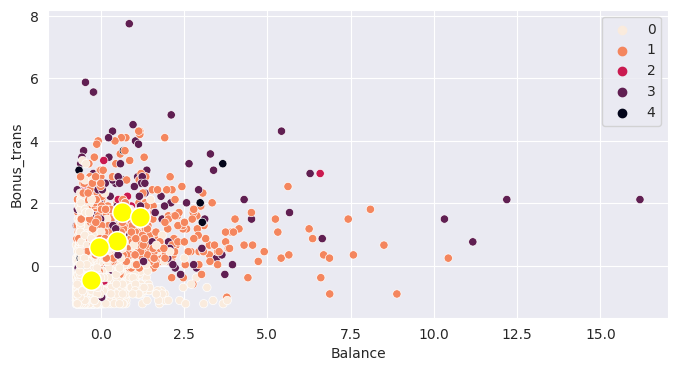

In [ ]:
sns.scatterplot(x = 'Balance', y = 'Bonus_trans', data = std_df, hue = 'Cluster_KM1', palette ='rocket_r')
sns.scatterplot( x= km.cluster_centers_[:,0], y = km.cluster_centers_[:,6], c = 'yellow', s = 200)


<Axes: xlabel='Bonus_miles', ylabel='Bonus_trans'>

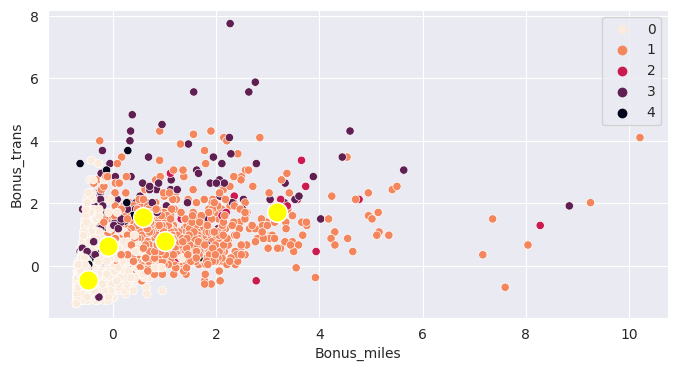

In [ ]:
sns.scatterplot(x = 'Bonus_miles', y = 'Bonus_trans', data = std_df, hue = 'Cluster_KM1', palette ='rocket_r')
sns.scatterplot( x= km.cluster_centers_[:,5], y = km.cluster_centers_[:,6], c = 'yellow', s = 200)


<Axes: xlabel='cc1_miles', ylabel='Bonus_trans'>

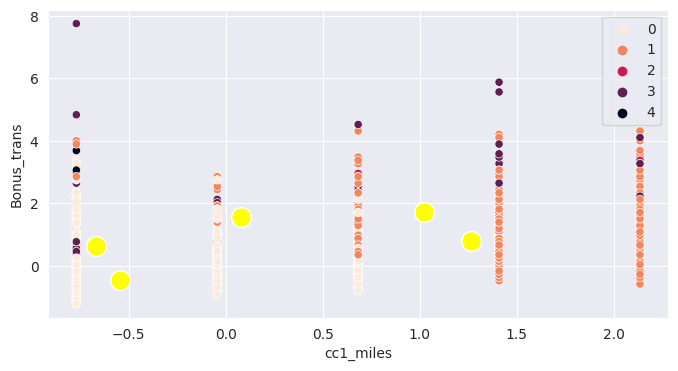

In [ ]:
sns.scatterplot(x = 'cc1_miles', y = 'Bonus_trans', data = std_df, hue = 'Cluster_KM1', palette ='rocket_r')
sns.scatterplot( x= km.cluster_centers_[:,2], y = km.cluster_centers_[:,6], c = 'yellow', s = 200)


As we can see,




*   When K=5, the centroid formed were very irrelevent

*   When K=2, the centroid formed were more relevent and informative than when k is 5. 
*   So, lets fix the K means model where K value(No of clusters) = 2



In [ ]:
std_df = std_df.drop('Cluster_KM1', axis =1)

In [ ]:
#k=2

from sklearn.cluster import KMeans
km = KMeans(n_clusters= 2)
cluster_km = km.fit_predict(std_df)            
std_df['Cluster_KM'] = cluster_km
std_df.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0 -0.451141   -0.186299  -0.769578  -0.098242  -0.062767    -0.702786   
1 -0.539457   -0.186299  -0.769578  -0.098242  -0.062767    -0.701088   
2 -0.320031   -0.186299  -0.769578  -0.098242  -0.062767    -0.539253   
3 -0.583799   -0.186299  -0.769578  -0.098242  -0.062767    -0.689286   
4  0.239678   -0.186299   1.409471  -0.098242  -0.062767     1.083121   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0    -1.104065          -0.328603        -0.362168           1.395454   
1    -0.999926          -0.328603        -0.362168           1.379957   
2    -0.791649          -0.328603        -0.362168           1.411920   
3    -1.104065          -0.328603        -0.362168           1.372208   
4     1.499394           1.154932         0.692490           1.363975   

      Award  Cluster_KM  
0 -0.766919           0  
1 -0.766919           0  
2 -0.766919           0  
3 -0.766919           0  
4  1.303918           1

In [ ]:
df['Cluster_KM'] = cluster_km
df.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    28143           0          1          1          1          174   
1    19244           0          1          1          1          215   
2    41354           0          1          1          1         4123   
3    14776           0          1          1          1          500   
4    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award  \
0            1                  0                0               7000      0   
1            2                  0                0               6968      0   
2            4                  0                0               7034      0   
3            1                  0                0               6952      0   
4           26               2077                4               6935      1   

   Cluster_HC  Cluster_KM  
0           0           0  
1           0           0  
2           0           0  
3           0           0  
4           3           1

In [ ]:
df.groupby('Cluster_KM').agg('mean')

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
Cluster_KM                                                               
0            45041.650352   89.232481   1.310716   1.016685   1.000371   
1           132760.658986  257.798771   3.610599   1.009985   1.036866   

             Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
Cluster_KM                                                                  
0            5421.404894     7.363737         215.211346         0.635521   
1           41429.117512    20.380952         967.233487         2.902458   

            Days_since_enroll     Award  Cluster_HC  
Cluster_KM                                           
0                 3720.834631  0.206897    0.533185  
1                 4942.417819  0.708909    2.096006

We can now clearly see the 2 number of clusters formed, which can be described as under

*   Cluster0, Tier 1 = "0" = Defines the group of fliers that earn the most out of the card and are frequent fliers

*   Cluster1, Tier 2 = "1" = Defines the group of fliers that earn the least and are the least frequent fliers






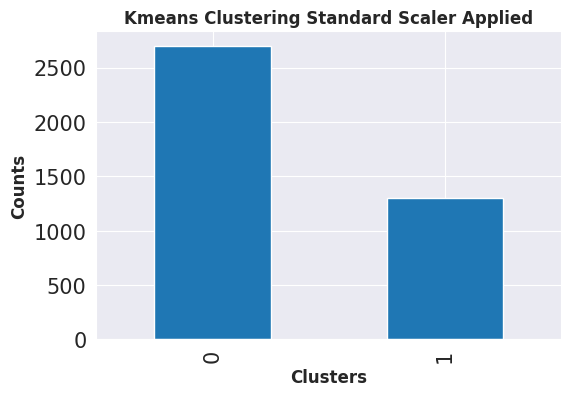

In [ ]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(6, 4))

df.groupby(['Cluster_KM']).count()['Balance'].plot(kind='bar')             #can use any column with unique values to count, since I dropped Id col, i'm using balance col to count

plt.title('Kmeans Clustering Standard Scaler Applied',fontsize='large',fontweight='bold')

ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('Counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()


# ***DBSCAN***

In [ ]:
#Model Building

from sklearn.cluster import DBSCAN
db = DBSCAN()                            ## Default epsilon = 0.5, MinPts = 5
cluster_db = db.fit_predict(std_df)
cluster_db

array([ 0,  0,  0, ..., -1,  0,  0])

In [ ]:
#To find the unique values in an array
from collections import Counter 

def unique(cluster_db):     
    print(*Counter(cluster_db))   # Print directly by using * symbol

print(unique(cluster_db))

0 -1 1 10 2 3 6 9 4 5 7 8 11 12 13 14 18 17 15 16
None




*   In DBSCAN, **-1** depicts outlier.
*   0,1,2,3,etc.. are the cluster formed. Here only 1 cluster is formed so only 0 is seen.
Lets see how many clusters can be formed

In [ ]:
std_df['Cluster_DB'] = cluster_db
std_df.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0 -0.451141   -0.186299  -0.769578  -0.098242  -0.062767    -0.702786   
1 -0.539457   -0.186299  -0.769578  -0.098242  -0.062767    -0.701088   
2 -0.320031   -0.186299  -0.769578  -0.098242  -0.062767    -0.539253   
3 -0.583799   -0.186299  -0.769578  -0.098242  -0.062767    -0.689286   
4  0.239678   -0.186299   1.409471  -0.098242  -0.062767     1.083121   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0    -1.104065          -0.328603        -0.362168           1.395454   
1    -0.999926          -0.328603        -0.362168           1.379957   
2    -0.791649          -0.328603        -0.362168           1.411920   
3    -1.104065          -0.328603        -0.362168           1.372208   
4     1.499394           1.154932         0.692490           1.363975   

      Award  Cluster_KM  Cluster_DB  
0 -0.766919           0           0  
1 -0.766919           0           0  
2 -0.766919           0           0  
3 -0.766919           0           0  
4  1.303918           1          -1

**Model Evaluation using Silhouette's Score**

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(std_df, labels = cluster_db)

0.25274714163339246

The score is less, lets try other values of epsilon and Min sample 

In [ ]:
from sklearn.cluster import DBSCAN
db1 = DBSCAN(eps=0.2, min_samples=3)
cluster_db1 = db1.fit_predict(std_df)
cluster_db1

array([ 0,  0,  1, ..., -1, -1,  0])

In [ ]:
def unique(cluster_db1):     
    print(*Counter(cluster_db1))   # Print directly by using * symbol

print(unique(cluster_db1))

0 1 -1 2 3 7 4 6 5 11 10 8 9 13 12 14 15 16 17 19 18 20 21 22 23 29 24 41 25 26 27 28 30 32 31 33 34 35 36 37 38 39 40 42 43 44 45 46 52 47 48 58 49 50 53 51 59 54 55 56 57 62 61 60
None


In [ ]:
silhouette_score(std_df, labels = cluster_db1)

-0.5213682701989947

The clusters formed are very high and the silhoutte score is less for most of the values I tried for eps & min_sample. So, to choose the best combination of the algorithm parameters I will first create a matrix of investigated combinations.

**DBSCAN evaluation using standardized data:**

In [ ]:
from itertools import product

eps_values = np.arange(0.25,3)                                 # eps values to be investigated
min_samples = np.arange(3,23)                                  # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))
DBSCAN_params

In [ ]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    dbs = DBSCAN(eps=p[0], min_samples=p[1])
    dbs_clustering = dbs.fit(std_df)
    no_of_clusters.append(len(np.unique(dbs_clustering.labels_)))
    sil_score.append(silhouette_score(std_df, dbs_clustering.labels_))

A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.


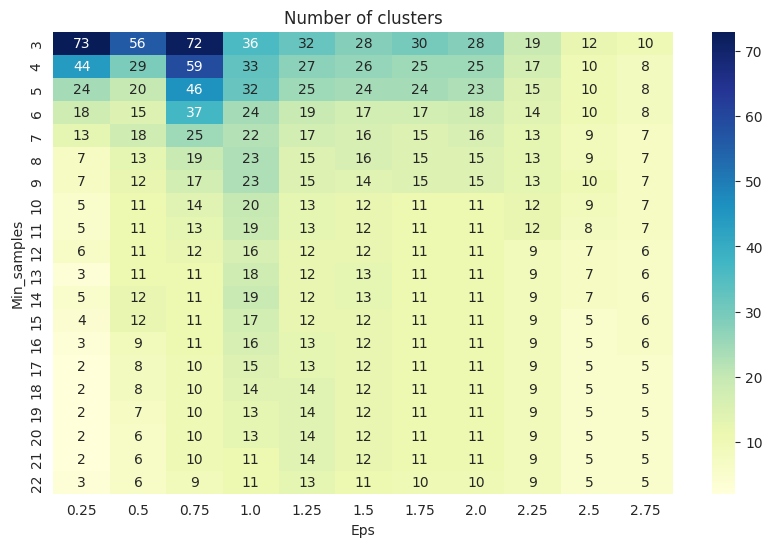

In [ ]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   #creating dataframe for eps & min_samples combinations 

tmp['No_of_clusters'] = no_of_clusters                                            #including no.of cluster in the tmp dataframe

pivot_std = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')        #creating a pivot table

fig, ax = plt.subplots(figsize=(10,6))

sns.heatmap(pivot_std, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)                       #heatmap of pivot table    

ax.set_title('Number of clusters')
print('A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.' )
plt.show()



A heatplot below shows Silhoutte Score were genreated by the algorithm for the respective parameters combinations.


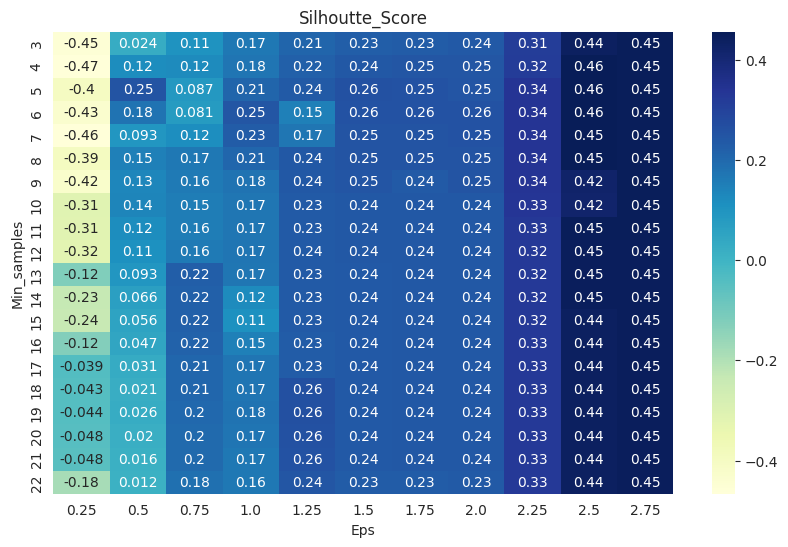

In [ ]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Silhoutte_Score'] = sil_score

pivot_std = pd.pivot_table(tmp, values='Silhoutte_Score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(10,6))

sns.heatmap(pivot_std, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)

ax.set_title('Silhoutte_Score')
print('A heatplot below shows Silhoutte Score genreated by the algorithm for the respective parameters combinations.' )
plt.show()

As we can see, the maximum best silhoutte score we can get is 46%, This occurs when eps value = 2.5 & min_samp = 4,5,6.

Lets check with the normalized data as well and then conclude.

**DBSCAN evaluation using normalised data**

In [ ]:
from itertools import product

eps_values1 = np.arange(0.25,1.25,0.25)                                 # eps values to be investigated
min_samples1 = np.arange(3,23)                                  # min_samples values to be investigated
DBSCAN_params1 = list(product(eps_values1, min_samples1))

In [ ]:
no_of_clusters1 = []
sil_score1 = []

for p in DBSCAN_params1:
    dbs = DBSCAN(eps=p[0], min_samples=p[1])
    dbs_clustering = dbs.fit(norm_df)                                        #using norm_df
    no_of_clusters1.append(len(np.unique(dbs_clustering.labels_)))
    sil_score1.append(silhouette_score(norm_df, dbs_clustering.labels_))

A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.


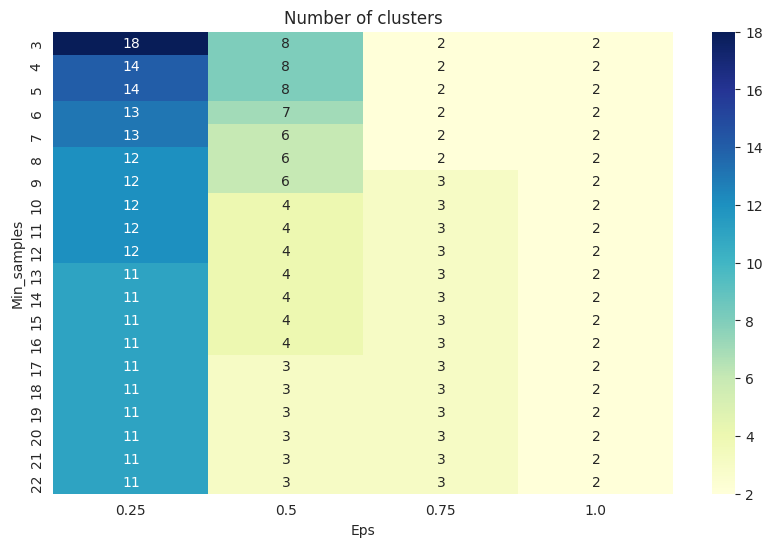

In [ ]:
tmp1 = pd.DataFrame.from_records(DBSCAN_params1, columns =['Eps', 'Min_samples'])       #creating dataframe for eps & min_samples combinations 

tmp1['No_of_clusters1'] = no_of_clusters1                                                #include no.of cluster in the tmp dataframe

pivot_norm = pd.pivot_table(tmp1, values='No_of_clusters1', index='Min_samples', columns='Eps')       #creating a pivot table

fig, ax = plt.subplots(figsize=(10,6))

sns.heatmap(pivot_norm, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)                       #heatmap of pivot table

ax.set_title('Number of clusters')
print('A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

In [ ]:
tmp1.head(2)

Eps  Min_samples  No_of_clusters1
0  0.25            3               18
1  0.25            4               14

A heatplot below shows Silhoutte Score genreated by the algorithm for the respective parameters combinations.


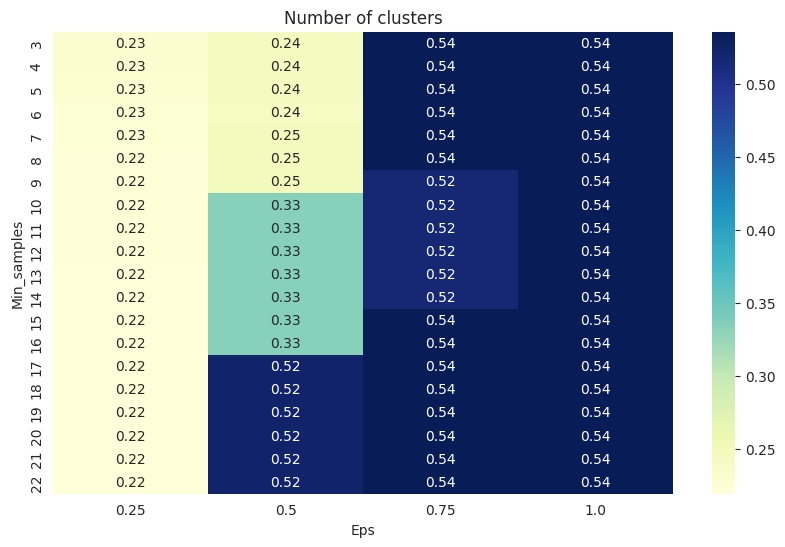

In [ ]:
tmp1 = pd.DataFrame.from_records(DBSCAN_params1, columns =['Eps', 'Min_samples'])   
tmp1['Silhoutte_Score1'] = sil_score1

pivot_norm = pd.pivot_table(tmp1, values='Silhoutte_Score1', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(10,6))

sns.heatmap(pivot_norm, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)

ax.set_title('Number of clusters')
print('A heatplot below shows Silhoutte Score genreated by the algorithm for the respective parameters combinations.')
plt.show()

As we can see,

*   The silhoutte score is 54% which is the highest mostly when no_of_clusters is 2. So lets take a eps value & min sample where no_of_clusters is 2 and silhoutte_score is 0.54
*   The silhoutte score the better in Normalised data than the standardised one. So lets fix this as the final  DBSCAN model.




**Final DBSCAN Model**

In [ ]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps= 1, min_samples= 7)                           
final_db_cluster = db.fit_predict(norm_df)
final_db_cluster

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
def unique(final_db_cluster):
  print(*Counter(final_db_cluster))
print(np.unique(final_db_cluster))

[0 1]


In [ ]:
silhouette_score(norm_df, labels = final_db_cluster)

0.535930510919477

In [ ]:
df['Cluster_DB'] = final_db_cluster

In [ ]:
df.head(2)

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    28143           0          1          1          1          174   
1    19244           0          1          1          1          215   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award  \
0            1                  0                0               7000      0   
1            2                  0                0               6968      0   

   Cluster_HC  Cluster_KM  Cluster_DB  
0           0           0           0  
1           0           0           0

In [ ]:
df.groupby('Cluster_DB').agg('mean')

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
Cluster_DB                                                              
0           59807.839555   87.602462   1.705322    1.01390   1.008737   
1           97053.051317  240.196489   2.661715    1.01553   1.018231   

             Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
Cluster_DB                                                                  
0           10227.689039     9.142971         226.292295         0.652502   
1           28905.414585    15.782579         857.501013         2.599595   

            Days_since_enroll  Award  Cluster_HC  Cluster_KM  
Cluster_DB                                                    
0                 3820.652105    0.0    0.641779    0.150516  
1                 4625.062120    1.0    1.722485    0.623228

In [ ]:
#converting as dataframe

Cluster_0 = pd.DataFrame(df.loc[df.Cluster_DB == 0].mean(), columns = ['Cluster_0'])
Cluster_1 = pd.DataFrame(df.loc[df.Cluster_DB ==1].mean(), columns = ['Cluster_1'])


In [ ]:
avg_df = pd.concat([Cluster_0,Cluster_1], axis =1)
avg_df

Cluster_0     Cluster_1
Balance            59807.839555  97053.051317
Qual_miles            87.602462    240.196489
cc1_miles              1.705322      2.661715
cc2_miles              1.013900      1.015530
cc3_miles              1.008737      1.018231
Bonus_miles        10227.689039  28905.414585
Bonus_trans            9.142971     15.782579
Flight_miles_12mo    226.292295    857.501013
Flight_trans_12        0.652502      2.599595
Days_since_enroll   3820.652105   4625.062120
Award                  0.000000      1.000000
Cluster_HC             0.641779      1.722485
Cluster_KM             0.150516      0.623228
Cluster_DB             0.000000      1.000000

**Inference:**

As we can see, Considering past Award status(0(No) or 1(Yes)), Cluster_1 shows award avg as 1 which means people were awarded with scheme. Similarly, for Cluster_0 award avg. is 0  which means people were not awarded with scheme. 

Since avg is low that means now maximim award given to Cluster_1 in the past. Need to add future schemes for Cluster_0 members on different bonus points & different card transaction bonus.

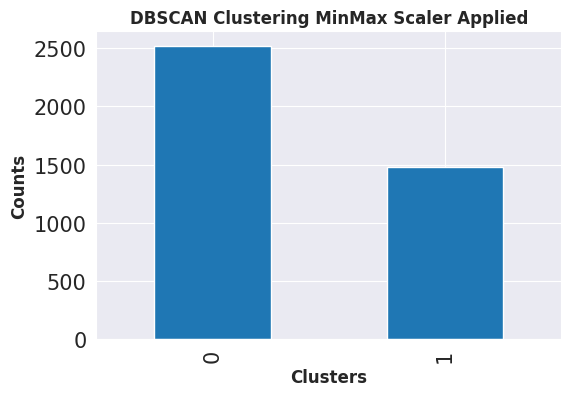

In [ ]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(6, 4))

df.groupby(['Cluster_DB']).count()['Balance'].plot(kind='bar')             #can use any column with unique values to count, since I dropped Id col, i'm using balance col to count

plt.title('DBSCAN Clustering MinMax Scaler Applied',fontsize='large',fontweight='bold')

ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('Counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()
